<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Александр! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# Исследование компьютерных игр.

### Цель проекта:

Провести анализ исторических данных  о продажах игр, взятых из открытых источников, и определить основные факторы коммерческого успеха игры, что позволит интернет-магазину «Стримчик» выбрать наиболее перспективные продукты и спланировать рекламные кампании.

### Задачи исследования:

#### [1. Изучение  данных](#stage_1)

#### [2. Предобработка данных](#stage_2)
- [Поиск и удаление дубликатов](#stage_2_1)
- [Обработка аномальных значений](#stage_2_2)
- [Обработка пропусков](#stage_2_3)
- [Изменение типов данных](#stage_2_4)
- [Добавление дополнительных данных](#stage_2_5)

#### [3. Исследовательский анализ данных](#stage_3)
- [Количество игр, выпущенные в разные годы](#stage_3_1)
- [Период "жизни" игровых платформ](#stage_3_2)
- [Наиболее перспективные платформы на 2017 год](#stage_3_3)
- [Влияние оценок пользователей и критиков на объем продаж](#stage_3_4)
- [Распределение игр по жанрам](#stage_3_5)

#### [4. Портрет пользователя по регионам](#stage_4)
- [Топ-5 популярных платформ по регионам](#stage_4_1)
- [Топ-5 популярных жанров по регионам](#stage_4_2)
- [Влияние ESRB рейтинга на объем продаж](#stage_4_3)

#### [5. Проверка гипотез](#stage_5)  
- [Средние пользовательские рейтинги платформ Xbox One и PC](#stage_5_1)
- [Средние пользовательские рейтинги жанров Action и Sports](#stage_5_2)

#### [6. Результаты исследования](#stage_6)

### Описание данных:

В архиве содержатся исторические данные о продажах компьютерных игр до 2016 года (включительно), оценки пользователей и экспертов, жанры и платформы (Xbox, PlayStation и т.д.) Данные за 2016 год могут быть неполными.  

**`Name`** — название игры  

**`Platform`** — платформа  

**`Year_of_Release`** — год выпуска  

**`Genre`** — жанр игры  

**`NA_sales`** — продажи в Северной Америке (миллионы проданных копий)  

**`EU_sales`** — продажи в Европе (миллионы проданных копий)  

**`JP_sales`** — продажи в Японии (миллионы проданных копий)  

**`Other_sales`** — продажи в других странах (миллионы проданных копий)  

**`Critic_Score`** — оценка критиков (максимум 100)  

**`User_Score`** — оценка пользователей (максимум 10)  

**`Rating`** — рейтинг от организации ESRB (возрастная категория)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, когда проект содержит описание c целью и краткий план исследования.👍 </font>

<a name='stage_1'></a>
## 1. Изучение общей информации о данных

Импортируем необходимые библиотеки:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats as st
from pandas.core.base import PandasObject
from IPython.display import display

%config InlineBackend.figure_format = 'retina'

# pd.options.display.float_format ='{: .2f}'.format
pd.set_option('display.float_format', '{: .2f}'.format)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn-ticks')

sns.set(rc = {'figure.figsize': (14, 4), 'axes.edgecolor': 'black', 'axes.facecolor': '#f4f4f4', 'grid.color': '#ccc', 'grid.linestyle': ':'})

Загрузим файл с исходными данными:

In [2]:
try:
    df = pd.read_csv('datasets/games.csv')
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Замечательно, что используется код двойной загрузки, локально и с сервера. Часто присылают на ревью проекты с не той ссылкой на датасет. Только по прямой ссылке можно грузить датасет и локально, и на сервере.</font>

Посмотрим на первые и последние 10 строк данных:

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.00,Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.00,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.00,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.00,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Начиная с первых строках уже немало пропусков - не хороший знак.

Изучим структуру датафрейма (типы данных, количество строк, столбцов, дубликатов и пропущенных знвчений):

**Выведем ощую информацию о датафрейме (типы данных, количество строк и столбцов):**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Оценим количество пропусков (относительно всего объема данных):**

In [6]:
df.isna().agg(['sum', 'mean'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
sum,2.00,0.00,269.00,2.00,0.00,0.00,0.00,0.00,8578.00,6701.00,6766.00
mean,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.51,0.40,0.40


In [7]:
df.isna().mean().sort_values(ascending=False).transform(lambda x: '{:,.2%}'.format(x))

Critic_Score       51.32%
Rating             40.48%
User_Score         40.09%
Year_of_Release     1.61%
Name                0.01%
Genre               0.01%
Platform            0.00%
NA_sales            0.00%
EU_sales            0.00%
JP_sales            0.00%
Other_sales         0.00%
dtype: object

**Проверим данные на наличие явных дубликатов:**

In [8]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, некоторые студенты забывают это сделать. 😊</font>

**Описательные статистики данных:**

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.00,NaN,NaN,NaN,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.00,NaN,NaN,NaN,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,NaN,NaN,NaN,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,NaN,NaN,NaN,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,NaN,NaN,NaN,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,NaN,NaN,NaN,68.97,13.94,13.00,60.00,71.00,79.00,98.00
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количиство уникальных значений 

### Результаты предварительного изучения данных:
- В файле содержится 16714 строк с информацией о 11559-ти играх в 12-ти жанрах, выпущенных для 31-ой платформы в период с 1980 по 2016 год  
- Явных дубликатов не обнаружено. В 6-ти столбцах есть пропуски значений  
- Названия столбецов преобразовать в нижний регистр  
- В столбеце с пользовательской оценкой встречается неизвестная аббревиатура ***'tbd'***  
- Имеются столбцы, в которых следует изменить тип данных для дальшейнего использования в анализе

<a name='stage_2'></a>
## 2. Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [10]:
df.columns = df.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

In [11]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a name='stage_2_1'></a>
### 2.1 Обработка дубликатов

Одинаковых строк в датафрейме не обнаружено. Однако в категориальных данных могут встречаться неявные дубликаты. Проверим их наличие, изучив уникальные значения соответствующих столбцов:

#### 2.1.1 Платформа

In [12]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликаты отсутствуют

#### 2.1.2 Жанр игры

In [13]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Дубликаты отсутствуют

#### 2.1.3 ESRB рейтинг

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Необходимо разобраться  с условными обозначениями (аббревиатурами)

Согласно информации на сайте ESRB (https://www.esrb.org/ratings-guide/):  

**`E`** - everyone (контент для всех)  
**`M`** - mature (от 17 лет и выше)  
**`T`** - teen (от 13 лет и выше)  
**`E10+`** - everyone 10+ (от 10 лет и выше)  
**`K-A`** - kids to adults (старое обозначение рейтинга "E")  
**`AO`** - adults only (от 18 лет и выше)  
**`EC`** - early childhood (заменён рейтингом "E" ввиду малого использования)  
**`RP`** - rating pending (рейтинг пока не определён)

Произведем замену: **`EC`**, **`K-A`** => **`E`**

In [15]:
df['rating'] = df['rating'].replace(['EC', 'K-A'], 'E')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! Сделали замену устаревшего рейтинга. 👍</font>

Проверим результаты замены:

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

<a name='stage_2_2'></a>
### 2.2 Обработка аномальных значений 

Aббревиатура ***'tbd'*** в столбце **`user_score`** от англ. "to be determined" (для определения) означает, что на момент сбора информации игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей.  

Заменим значение ***'tbd'*** на ***'NaN'***, т.к. по ним рейтинг пока отсутствует и неизвестно каким он будет:

In [17]:
df['user_score']  = df['user_score'].replace('tbd', np.nan)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

Проверим результаты замены:

In [18]:
df[df['user_score'] == 'tbd']['user_score'].count()

0



Оценка пользователей приведена к десятичному числовому типу, значения ***'tbd'*** заменены на ***'NaN'***, т.к. по ним рейтинг пока отсутствует и неизвестно каким он будет.


<a name='stage_2_3'></a>
### 2.3 Обработка пропусков

Будем действовать по следующему сценарию:  
* Удалим строки с небольшой долей пропусков
* По порядку будем обрабатывать остальные пропуски

#### 2.3.1 Удаление строк с небольшой долей пропусков

In [19]:
df.isna().sum().loc[['name', 'genre', 'year_of_release']]

name                 2
genre                2
year_of_release    269
dtype: int64

Пропуски **`name`**, **`genre`** содержатся всего в 2 строках:

In [20]:
df[df['name'].isna() & df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Природу появления пропусков сложно определить. Возможно их появление связано с технической ошибкой , либо данные были утеряны, учитывыя год выпуска игр.  

Удалим записи:

In [21]:
df = df.drop(df[df['name'].isna() & df['genre'].isna()].index)

В столбце **`year_of_release`** 269 пропущенных значений (1.6%). Посмотрим на первые 5 строк с пропусками:

In [22]:
df[df['year_of_release'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В некоторых записях также есть пропуски в других столбцах. Удалим записи:

In [23]:
df = df.drop(df[df['year_of_release'].isna()].index)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

In [24]:
df.isna().sum().loc[['name', 'genre', 'year_of_release']]

name               0
genre              0
year_of_release    0
dtype: int64

<!-- #### 2.3.2  Дата выпуска -->

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А зачем нам получать медианную "температуру" по "больнице" по пропускам года релиза когда их всего 1,6%. Удалить их и забыть.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Удалил строки с пропусками года релиза и ячейки для их обработки</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Почему удаляем год релиза и когда, что удалять. В реальности все зависит от поставленной задачи на исследование. В данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. А можно провести анализ, сколько пропусков года релиза приходится на платформы, которые например к 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.</font>

#### 2.3.2  ESRB рейтинг

In [25]:
df['rating'].isna().sum()

6676

В столбце **`rating`** 6764 пропущенных значений (40.48%). Посмотрим на первые 5 строк с пропусками:

In [26]:
df[df['rating'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Знвчения **`rating`** отсутствуют независимо от платформы, жанра игры и года выпуска.

ESRB была основана в 1994 году, игры, выпущеные ранее, не могли получить рейтинг этой организации.

In [27]:
df[(df['rating'].isna()) & (df['year_of_release'] <= 1994)]['year_of_release'].count()

481

<!-- Попробуем заполнить пропуски значениями рейтинга одноименнх игр, выпущенных для других платформ: -->

In [28]:
# df =  df.fillna({'rating': df.groupby('name')['rating'].transform('first')})

Поскольку ESRB действует только на территории США и Канады, то в играх, выпущенных для Европейского или Японского рынка, может также отсутствовать этот рейтинг.

In [29]:
df[(df['rating'].isna()) & (df['na_sales'] == 0)]['name'].count()

3688

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады, а значит пропуск не связан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры. А вот если прикрутить к пропускам рейтинга заглушку, то потом при его анализе мы получим интересную информацию.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>По этому пункту все поправил</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

In [30]:
# df['rating'].isna().sum()

Заполним пропуски заглушкой:

In [31]:
df['rating'] = df['rating'].fillna('NO_ESRB')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 А вот это уже правильно, но можно было не пустую строку, а например `no_ESRB`.</font>

In [32]:
df['rating'].isna().sum()

0

**2.3.3 Пользовательские оценки и оценки критиков**

In [33]:
df[['critic_score', 'user_score']].isna().sum()

critic_score    8461
user_score      8981
dtype: int64

В столбцах **`critic_score`**, **`user_score`** много пропущенных значений – 8576 (51.32%) и 9123 (40.09%) соответственно.  
Посмотрим на первые 10 строк с пропусками:

In [34]:
df[df['critic_score'].isna() | df['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NO_ESRB
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NO_ESRB
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NO_ESRB
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NO_ESRB
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NO_ESRB
12,Pokemon Gold/Pokemon Silver,GB,1999.00,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NO_ESRB
18,Super Mario World,SNES,1990.00,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NO_ESRB
20,Pokemon Diamond/Pokemon Pearl,DS,2006.00,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NO_ESRB
21,Super Mario Land,GB,1989.00,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NO_ESRB
22,Super Mario Bros. 3,NES,1988.00,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NO_ESRB


Данные пропущены для разных платформ, жанров, и года выпуска игр. Возможно количества оценок было недостаточно для публикации, или просто отсутствовали при сборе информации. Не исключена вероятность утери данные при загрузке/выгрузке данных из базы.  
    
На основании имеющихся данных проставить недостающие оценки нельзя. Заполним значением ***'-1'***:

In [35]:
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(-1)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что заменили пропуски на заглушки. 👍 Главное потом не забывать их отфильтровывать при анализе.</font><br>

In [36]:
df[['critic_score', 'user_score']].isna().sum()

critic_score    0
user_score      0
dtype: int64

**Проверим наличие пропусков, по результатам их обработки, убедимся, что не появились дубликаты строк:**

In [37]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [38]:
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, некоторые студенты забывают это сделать. 😊</font>

<a name='stage_2_4'></a>
### 2.4. Изменение типов данных

Год выпуска не может быть вещественным значением. Заменим тип данных столбца **`year_of_release`** на ***'int'***:


In [39]:
df['year_of_release'] = df['year_of_release'].astype(int)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font>

Тип данных в столбце **`user_score`** не соответствует хранящейся в нем информации, заменим его ***'float64'***: 

In [40]:
df['user_score'] = df['user_score'].astype(float)

In [41]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<a name='stage_2_5'></a>
### 2.5 Добавление дополнительных данных

Для каждой игры рассчитаем суммарное количество продаж по всем регионам и запишим полученные значения в отдельный столбец:

In [42]:
df.insert(8, 'total_sales', df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍</font>

In [43]:
df['total_sales'].describe()

count    16444.00
mean         0.54
std          1.56
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

In [44]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   total_sales      16444 non-null  float64
 9   critic_score     16444 non-null  float64
 10  user_score       16444 non-null  float64
 11  rating           16444 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : ко

<a name='stage_3'></a>
## 3. Исследовательский анализ данных

<a name='stage_3_1'></a>
### 3.1 Количество игр, выпущенные в разные годы

Посмотрим, сколько игр выпускалось в каждый из представленных в наших данных годов:

In [45]:
df[df['year_of_release'] > 0]['year_of_release'].value_counts().sort_index(ascending=True).index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016],
           dtype='int64')

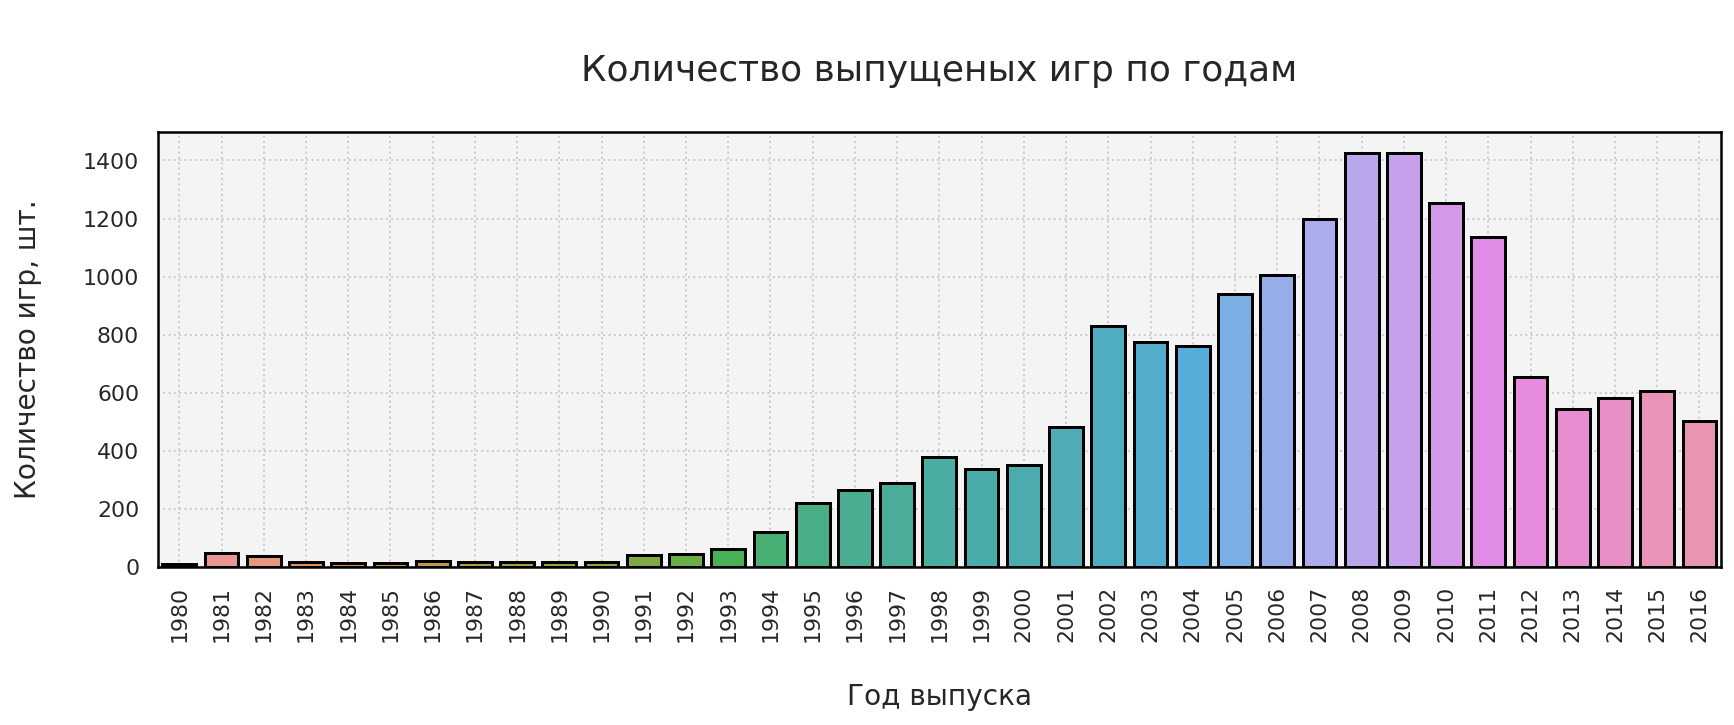

In [46]:
ax = sns.countplot(
    data=df[df['year_of_release'] > 0],
    x='year_of_release', linestyle = "-", linewidth = 1.5, ec='black')

ax.set_title('\nКоличество выпущеных игр по годам\n', fontsize=18)
ax.set_xlabel('\nГод выпуска', fontsize=14)
ax.set_ylabel('Количество игр, шт.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍 И правильно, что оси подписаны.</font>

In [47]:
df = df.drop(df[df['year_of_release'] < 1994].index).reset_index(drop=True)

**Выводы:**
- До 1994 года выпускалось мало игр, далее ими можно будет пренебречь.
- Резкий скачок по количеству выпущенных игр произошел в 2002 году. Пик - 2008-2009 года. 
- Резкий спад после 2011 года может быть связан со снижением количества игровых платформ или миграцией игровой индустрии на мобильные платформы.

<a name='stage_3_2'></a>
### 3.2 Определение периода "жизни" игровых платформ

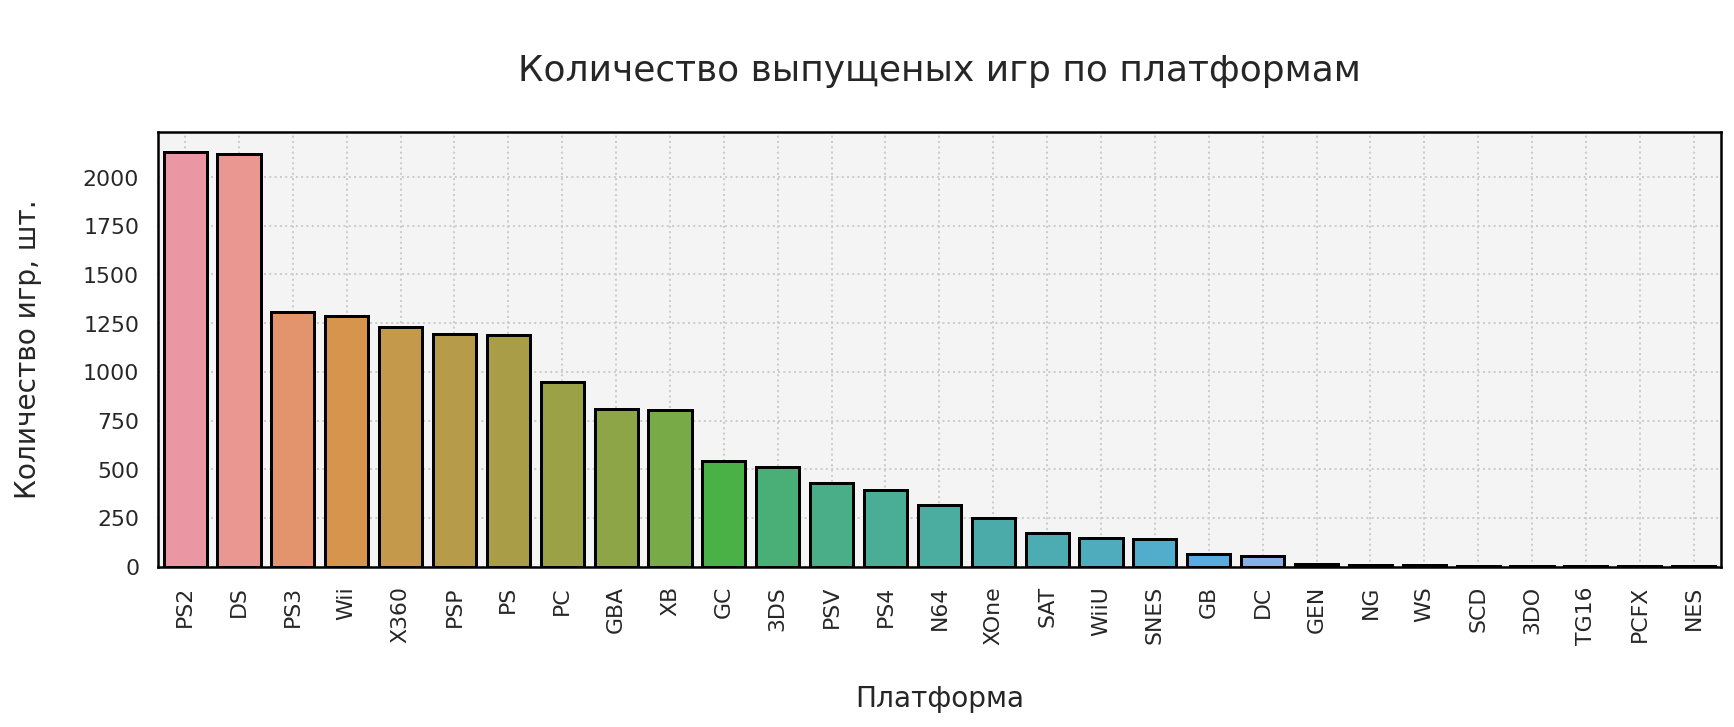

In [48]:
ax = sns.countplot(
    data=df, x='platform', order = df['platform'].value_counts().index,
    linestyle = '-', linewidth = 1.5, ec='black')

ax.set_title('\nКоличество выпущеных игр по платформам\n', fontsize=18)
ax.set_xlabel('\nПлатформа', fontsize=14)
ax.set_ylabel('Количество игр, шт.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

Большинство игр были выпущены для платформах компаний Sony, Nintnedo, Microsoft а так же для ПК, что вполне соответствует реальной ситуации на рынке компьютерных игр. Выборка выглядит репрезентативной.

Построим распределение общих объемов продаж:

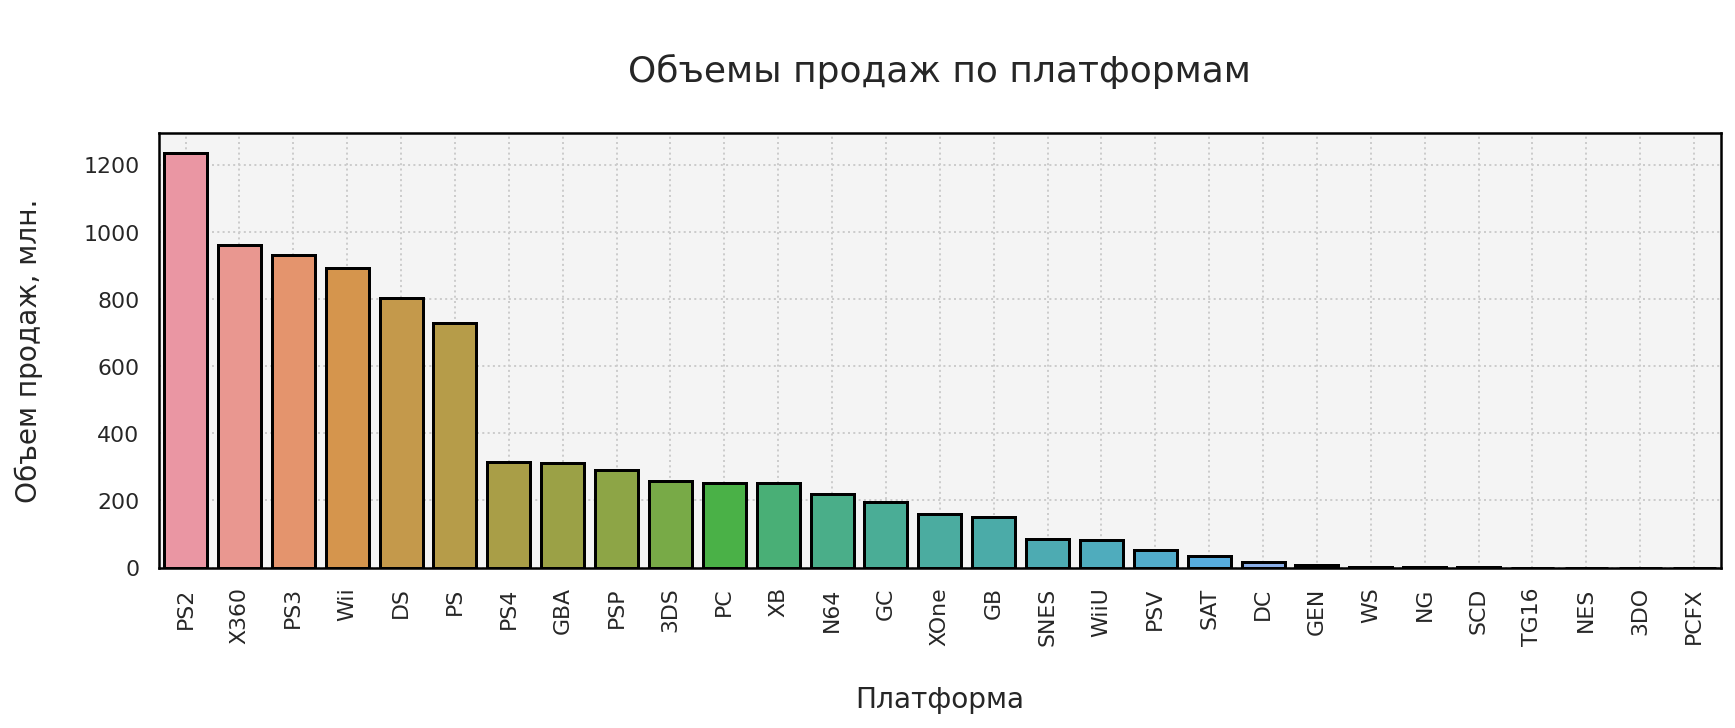

In [49]:
ax = sns.barplot(
    data=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).to_frame().reset_index(),
    x='platform', y='total_sales', linestyle = "-", linewidth = 1.5, ec='black')

ax.set_title('\nОбъемы продаж по платформам\n', fontsize=18)
ax.set_xlabel('\nПлатформа', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

Посмотрим, как менялись продажи игр для этих платформ в течении рассматриваемого периода: 

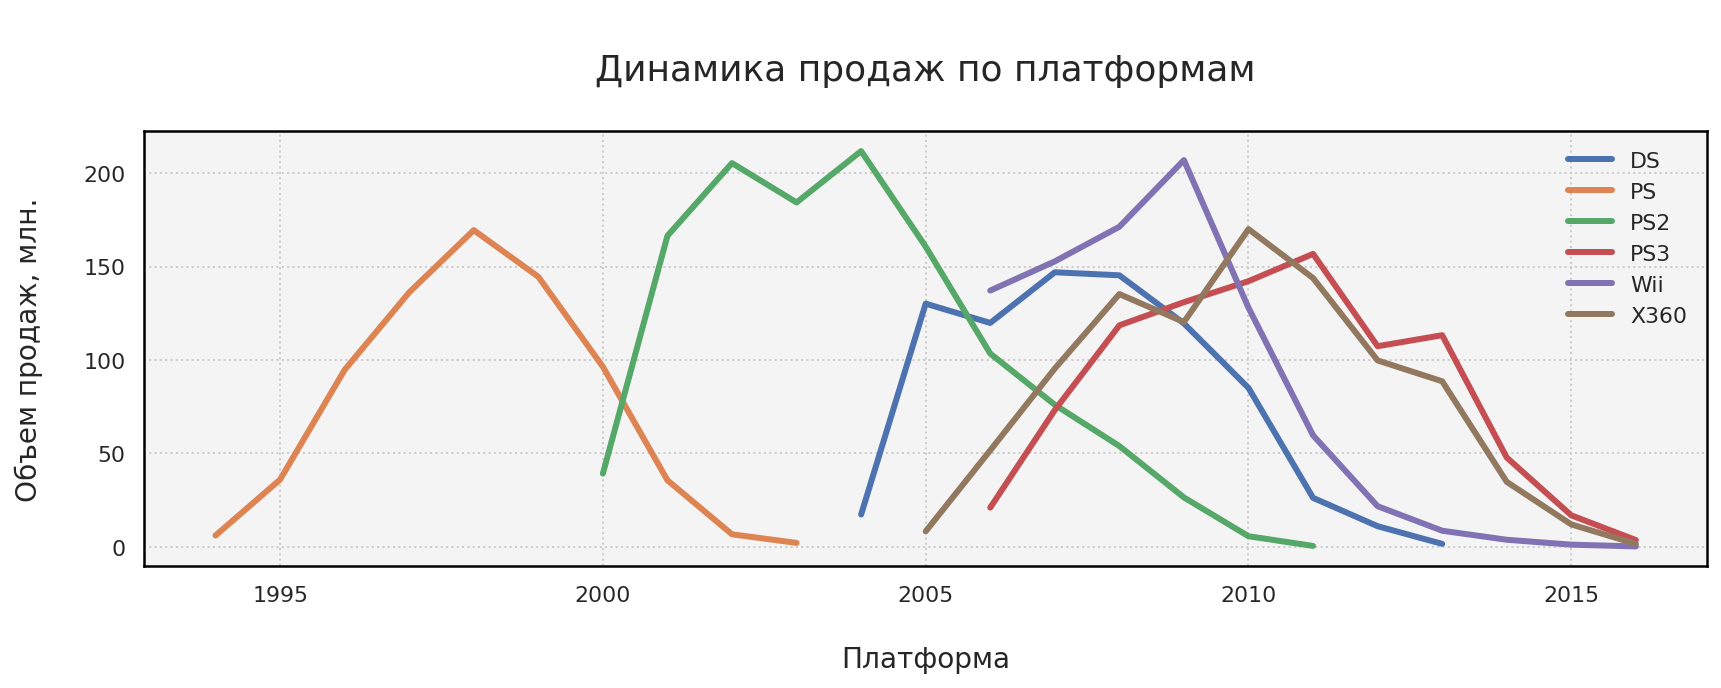

In [50]:
data = (df.query('platform in {}'
         .format(list(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index)))
            .pivot_table(index='year_of_release', columns=['platform'], values=['total_sales'], aggfunc='sum').reset_index())

for platform in data['total_sales'].columns:
    ax = sns.lineplot(data=data, x='year_of_release', y=data['total_sales'][platform], label=platform, linewidth=3)

ax.set_title('\nДинамика продаж по платформам\n', fontsize=18)
ax.set_xlabel('\nПлатформа', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

# plt.legend()
plt.show()

**Периоды "жизни" разных платформ:**
* PS - прожила с 1994 до 2003 гг. - 10 лет;
* PS2 - с 2000 до 2011 гг. - 12 лет;
* PS3 - с 2006 до настоящего времени, с выходом в 2013 году PS4 начала сильно сдавать позиции;
* DS - с 2004 до 2013 гг. - 10 лет;
* Wii - с 2006 настоящего времени, но в 2016 году практически изжила себя - опять 10 лет.  

Таким образом, период "жизни" игровой платформы в среднем составляет 10 лет. Уход старых платформ с рынка неизбежен, т.к. прогресс не стоит на месте и старое "железо" перестает отвечать техническим требованиям новых игр.

<a name='stage_3_3'></a>
### 3.3 Определение наиболее перспективных платформ на 2017 год

Посмотрим на статистику продаж по платформам за последние 3 года, которые будем считать актуальным периодом ввиду того, что игровая индустпия - динамично меняющаяся. Однака в некоторых срезах стоит учитывать, что данные за 2016 год не полные. 

<!-- Рассматривать будем только актуальные платформы, т.е. платформы, для которых выпускались игры в 2016 году. -->

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не более 5 лет).<br> А вот исключать 2016 год нельзя. В реальности прогнозы на следующий год составляются осенью и обязательно включают не полные данные текущего года, так как это самые свежие тенденции рынка.</font>

In [51]:
# df_actual = df.query('2013 < year_of_release < 2017 and platform in {}'
#         .format(list(df.query('year_of_release == 2016')
#     .groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index)))

In [52]:
df_actual = df.query('2013 < year_of_release < 2017')

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 На практике приходится проводить несколько итераций иследования, изменяя период. Период с которого результат анализа перестает изменяться, принимаем актуальным. Плюс учитываем бизнес-практику отрасли, по которой делаем проект. Аналитику все равно приходится погружаться в бизнес процессы, что бы понимать данные датасета, которые как раз и отражают эти процессы. В нашем случае, 5 лет это примерно половина срока жизни платформы.</font>

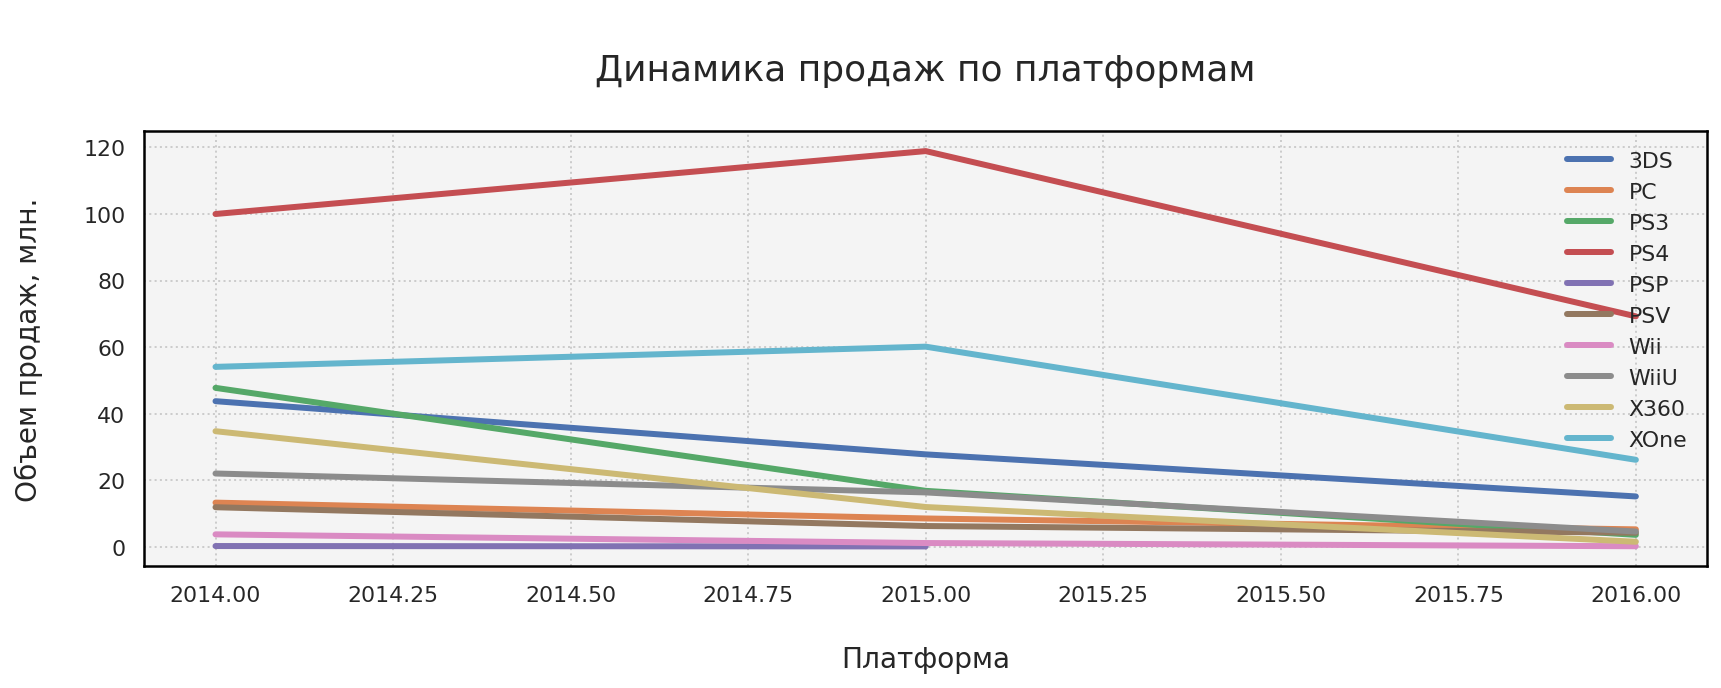

In [53]:
data = (df_actual.pivot_table(
    index='year_of_release', columns=['platform'], values=['total_sales'], aggfunc='sum').reset_index())

for platform in data['total_sales'].columns:
    ax = sns.lineplot(
        data=data, x='year_of_release', y=data['total_sales'][platform], label=platform, linewidth=3)

ax.set_title('\nДинамика продаж по платформам\n', fontsize=18)
ax.set_xlabel('\nПлатформа', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

# plt.legend()
plt.show()

Все платформа, кроме ***'PS4'***, ***'XOne'*** и ***'3DS'*** к концу рассматриваемого периода практически утратили актуальность и не могут рассматриваться в качестве перспективных на 2017 год.

Посмотрим на диаграму размаха объема продаж игр в разбивке по платформам:

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А почему мы строим диаграммы размаха с фильтрацией по платформам? В задании топ-платформы не требуются, предполагаются все. Мы таким образом теряем информацию.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Исправлено</font>

In [54]:
# Комментарий ревьюера
df_actual.platform.unique(), df.query('2010 < year_of_release < 2016').platform.unique()

(array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
        'PSP'], dtype=object),
 array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
        'PSV', 'PSP', 'PS2'], dtype=object))

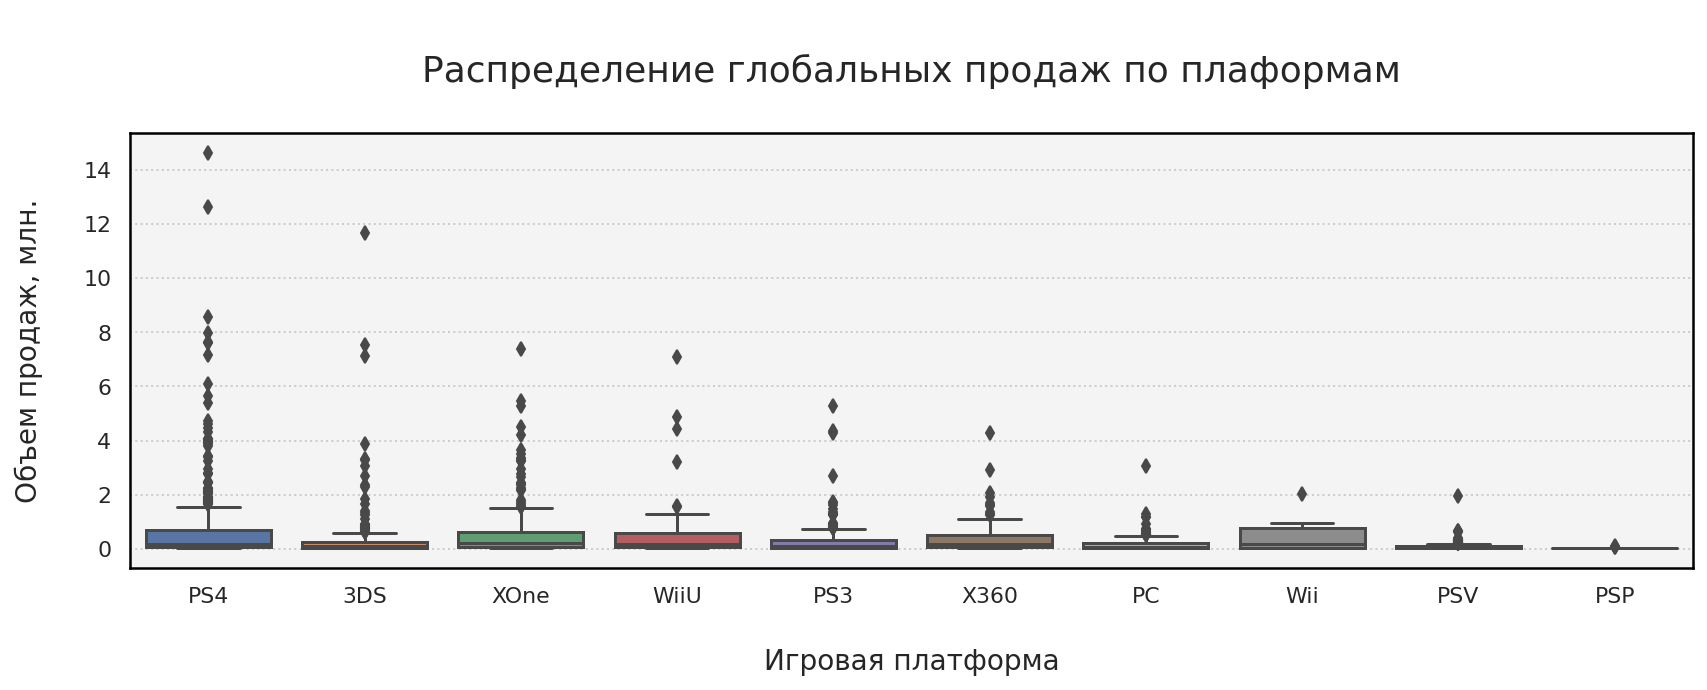

In [55]:
plt.figure()
ax = sns.boxplot(data=df_actual, x='platform', y='total_sales' )

ax.set_title('\nРаспределение глобальных продаж по плаформам\n', fontsize=18)
ax.set_xlabel('\nИгровая платформа', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

plt.show()

Из-за большого количества выбросов, график не читаем. Уменьшим диапазон значений по иси ***'y'***:

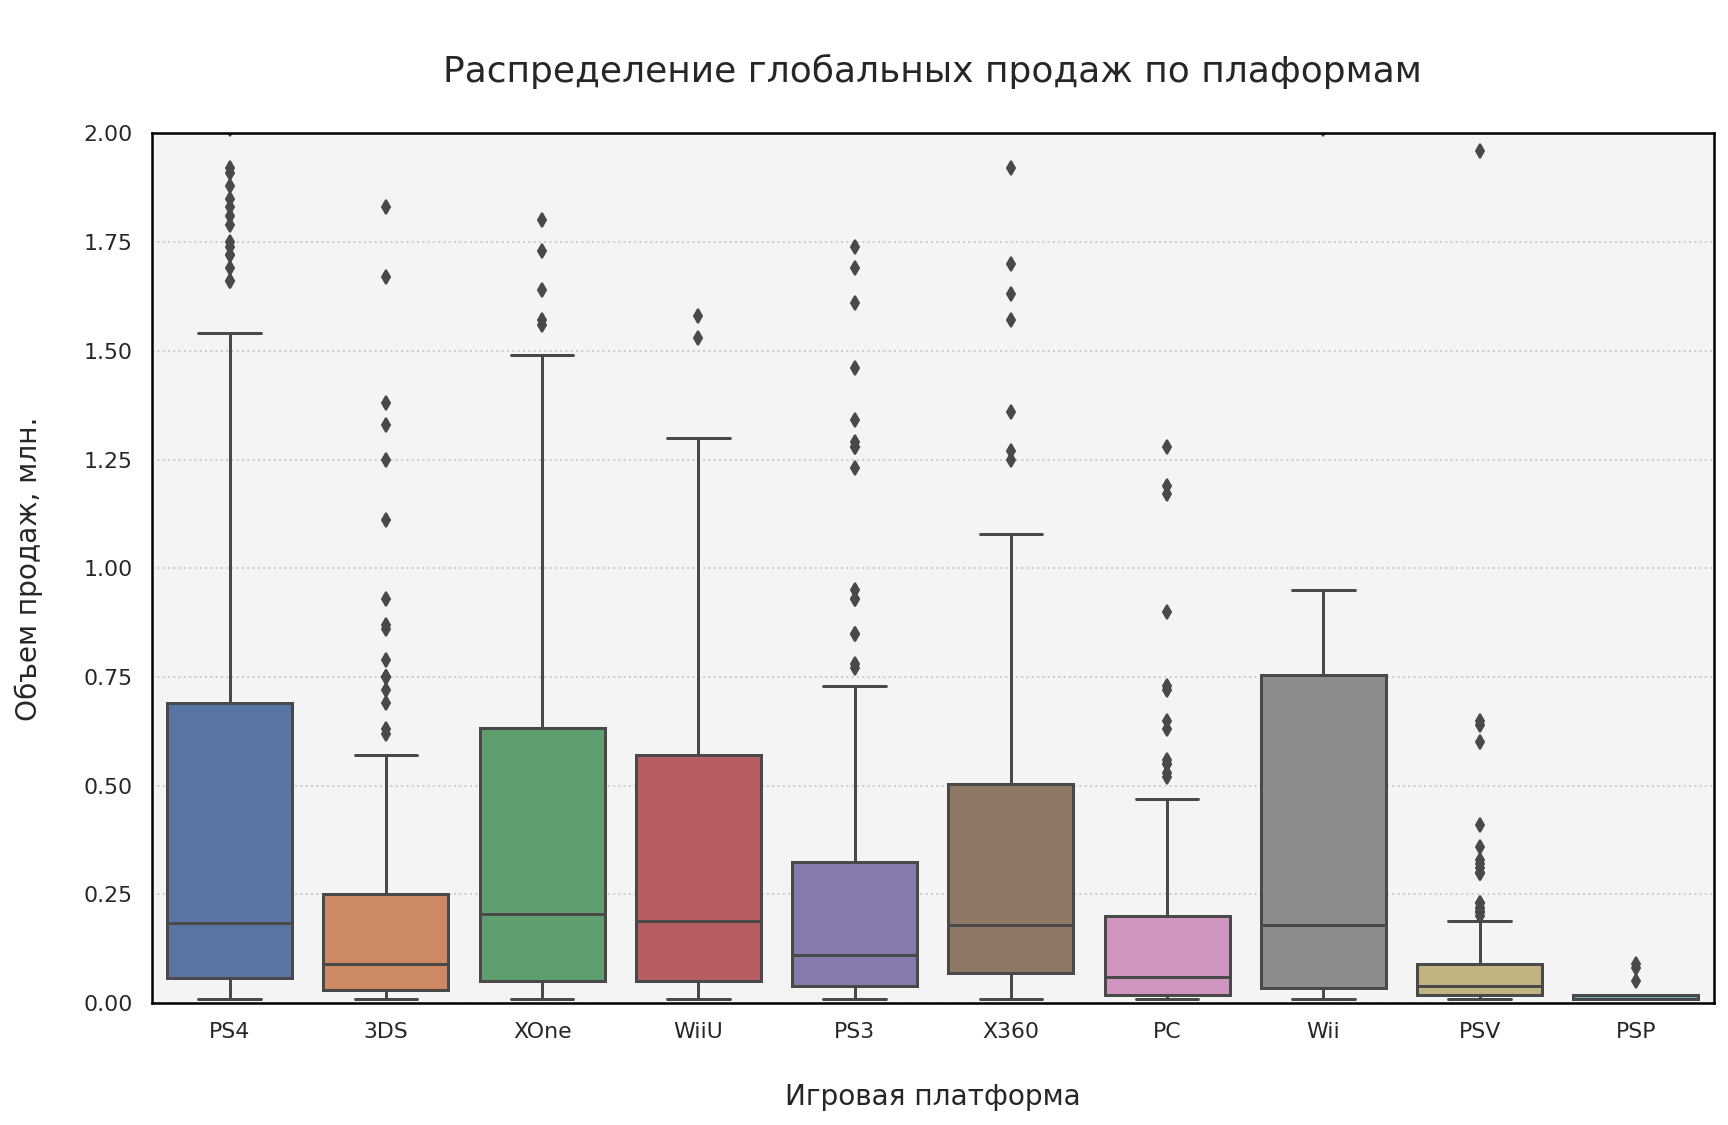

In [56]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data=df_actual, x='platform', y='total_sales')

ax.set_ylim([0, 2])

ax.set_title('\nРаспределение глобальных продаж по плаформам\n', fontsize=18)
ax.set_xlabel('\nИгровая платформа', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что диаграммы размаха сделали в двух видах, в полном со всеми вылетами и в масштабированном виде, где хорошо видны боксплоты. </font>

В данных по прежнему много выбросов. Значения глобальных продаж по всем платформам сильно скошены вправо. Есть большое количество игр с очень высокими показателями продаж по сравнению с медианным значениями. Это особенность индустрии, поскольку успех конкретной игры складывается из многих факторов, и не всегда зависит от платформы, для которой она разрабатывалась.  

У платформы ***'3DS'*** одни из худших показатели (мендианное значение, диапазон Q1 - Q3), ее также не стоит рассматривать в качестве перспективной на 2017 год.

**Выводы:**
- Платформы ***'PS4'*** и ***'XOne'*** имеют лучшие показатели глобальных продаж за актуальный период, и могут считаться наиболее перспективными на 2017 год. Поскольку они были выпущены позднее других платформ, продажи по ним еще не достигли своего пика и стабильно растут вверх. Спад в 2016 году в рассчет не берем, поскольку данные по нему не полные.

<a name='stage_3_4'></a>
### 3.4 Изучение влияния оценок пользователей и критиков на объем продаж 

**Для определения зависимостиглобальных продаж от пользовательсктх оценок и оценок критиков:**
- Построим диаграмму рассеяния с линейной регрессией
- Посчитаем корреляцию между оценками и объемом продаж


#### 3.4.1 Зависимость глобальных продаж от пользовательсяких оценок

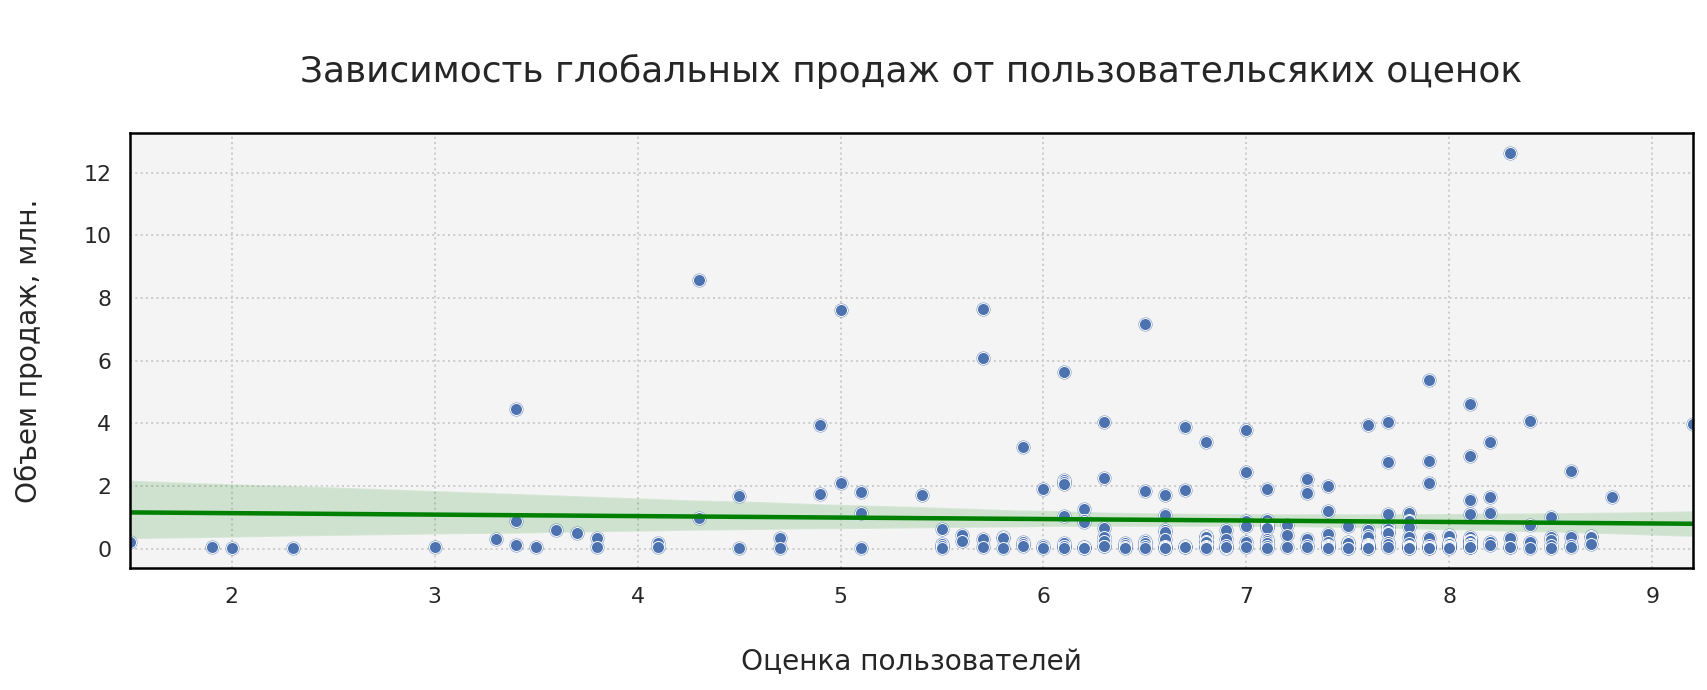

In [57]:
sns.regplot(
    data=df_actual.query('platform == "PS4" and user_score > 0'),
    x='user_score', y='total_sales',  line_kws = {'color': 'green'})

ax = sns.scatterplot(data=df_actual.query('platform == "PS4" and user_score > 0'), x='user_score', y='total_sales')

ax.set_title('\nЗависимость глобальных продаж от пользовательсяких оценок\n', fontsize=18)
ax.set_xlabel('\nОценка пользователей', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

plt.show()

Коэффициент корреляции Пирсона:

In [58]:
(df_actual.query('platform == "PS4" and user_score > 0')['total_sales']
    .corr(df_actual.query('platform == "PS4" and user_score > 0')['user_score']))

-0.040131589472697356

#### 3.4.1 Зависимость глобальных продаж от оценок критиков

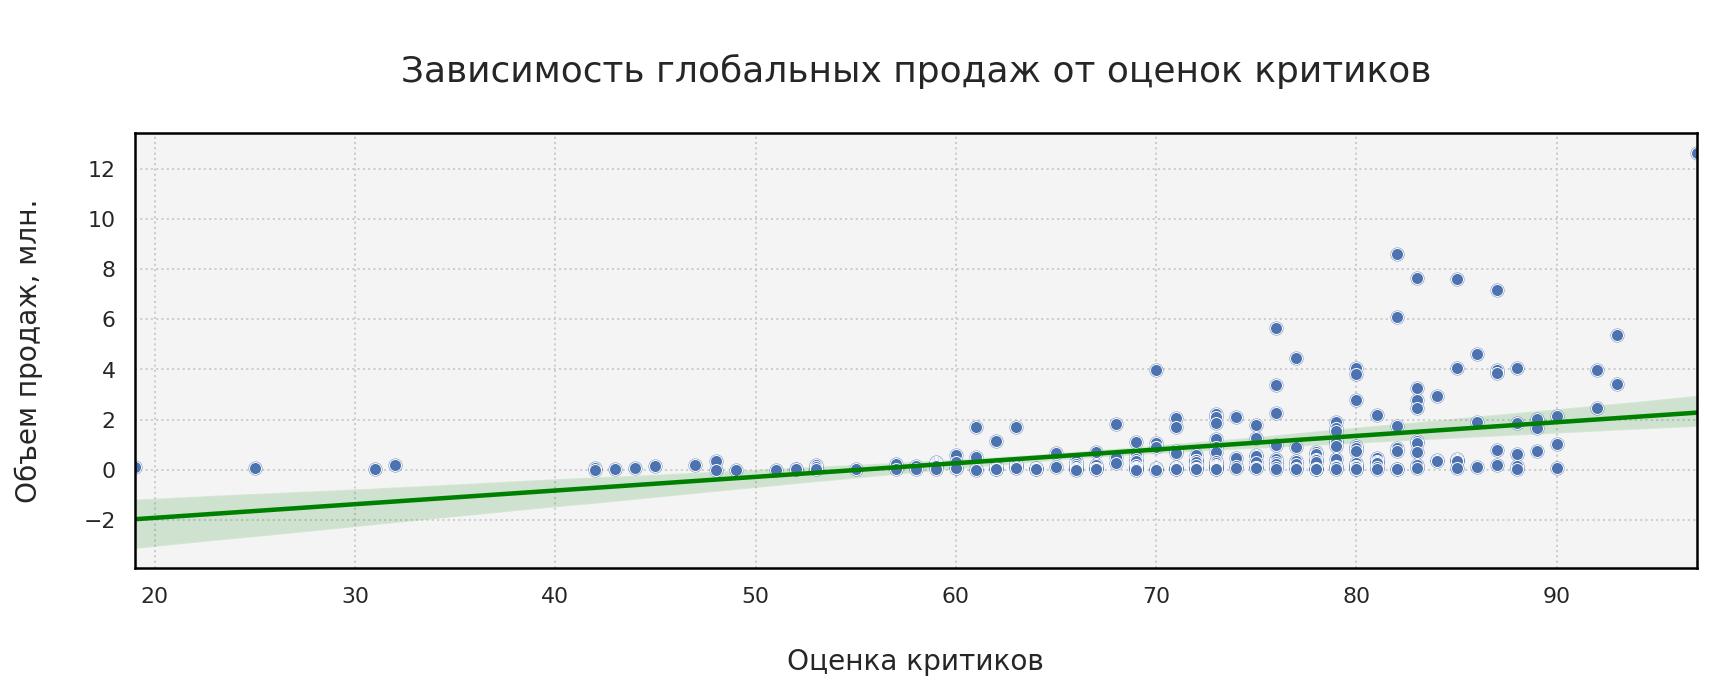

In [59]:
sns.regplot(
    data=df_actual.query('platform == "PS4" and critic_score > 0')
    , x='critic_score', y='total_sales',  line_kws = {'color': 'green'})

ax = sns.scatterplot(
    data=df_actual.query('platform == "PS4" and critic_score > 0'),
    x='critic_score', y='total_sales')

ax.set_title('\nЗависимость глобальных продаж от оценок критиков\n', fontsize=18)
ax.set_xlabel('\nОценка критиков', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

plt.show()

Коэффициент корреляции Пирсона:

In [60]:
(df_actual.query('platform == "PS4" and critic_score > 0')['total_sales']
    .corr(df_actual.query('platform == "PS4" and critic_score > 0')['critic_score']))

0.40266141068104083

**Предварительные ыводы:**
- На графиках видно, что между глобальными продажами игр на ***'PS4'*** и отзывами критиков есть небольшая корреляция, что подтверждает коэффициент корреляции 0.4
- Между глобальными продажами игр на ***'PS4'*** и пользовательскими оценками зависимость не наблюдается. Отрицательное значение коэффициента корреляции может быть обусловлено выбросами
- Можно сделать вывод, что пользователям игровой платформы ***'PS4'*** важнее мнение критиков

Сравним коэффициенты корреляции с другими актуальными платформами:

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Как-то мы оптом отфильтровываем заглушки. Если мы анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных и искажению расчета корреляции. См.код ниже.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Исправлено. Все логично, виной всему копипаста)</font>

In [61]:
# Комментарий ревьюера
print(len(df_actual.query('user_score > 0')))
print(len(df_actual.query('critic_score > 0')))
print(len(df_actual.query('user_score > 0 and critic_score > 0')))

888
718
704


In [62]:
# df_filtered = df_actual.query('user_score > 0 and critic_score > 0')
# platforms = ['X360', 'PS3', 'WiiU', '3DS', 'PS4', 'XOne']

# cols = 2
# rows = (len(platforms) + 1) // 2
# count = 0

# fig, axes = plt.subplots(rows, cols, figsize=(14, 8))

# for i in range(rows):
#     for j in range(cols):
#         ax = sns.heatmap(
#                 data = df_filtered[
#                     df_filtered['platform'] == platforms[count]
#                 ][['total_sales' ,'critic_score', 'user_score']].corr()[['total_sales']],
#             cmap="Greens", annot=True, annot_kws={'size': 14}, ax=axes[i, j])
        
#         ax.set_title(platforms[count], fontsize=20)
#         ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        
#         plt.tight_layout(pad=4)
        
#         count += 1

# plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну и по остальным посчитали корреляцию. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Переделал. Получилось более информативнее:</font>

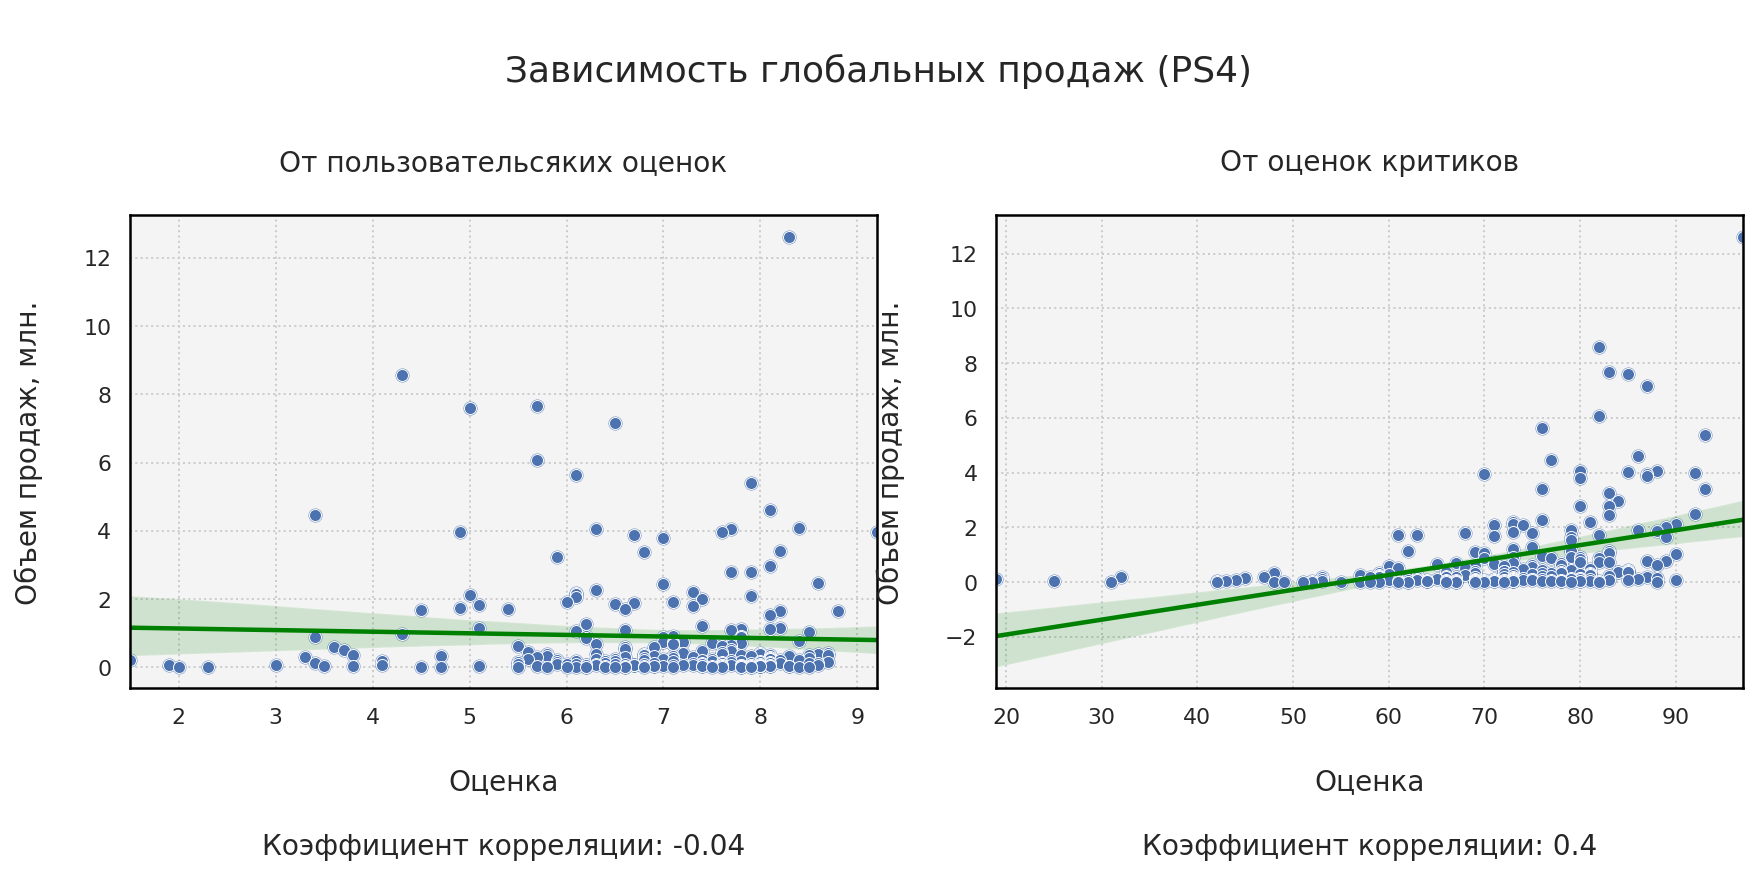

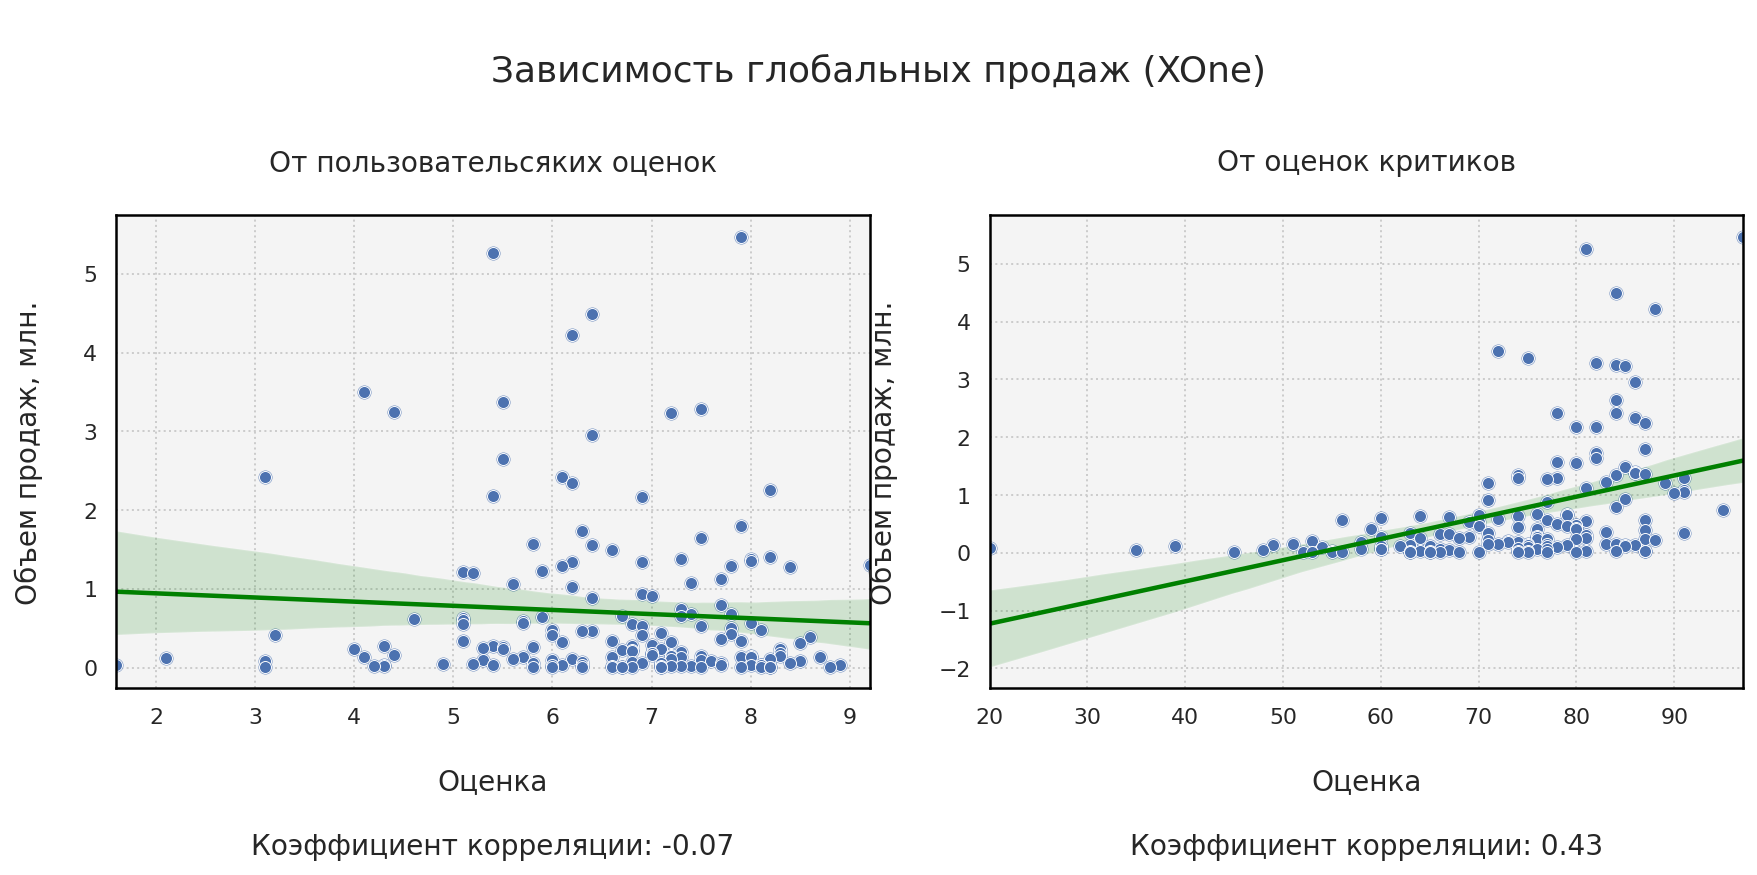

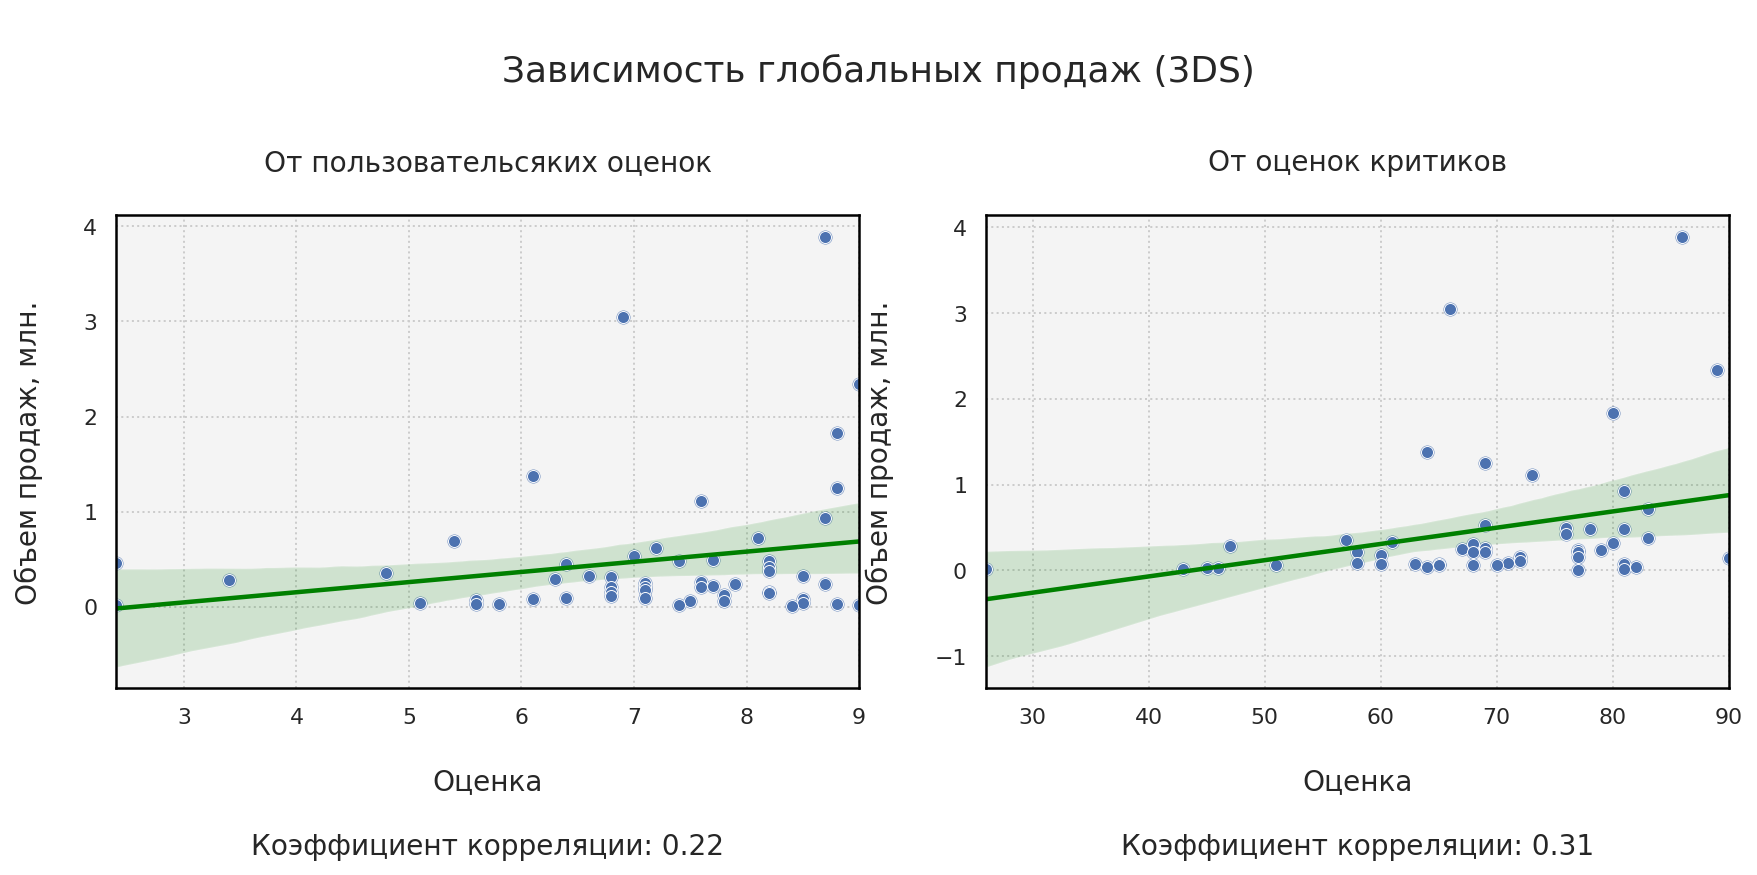

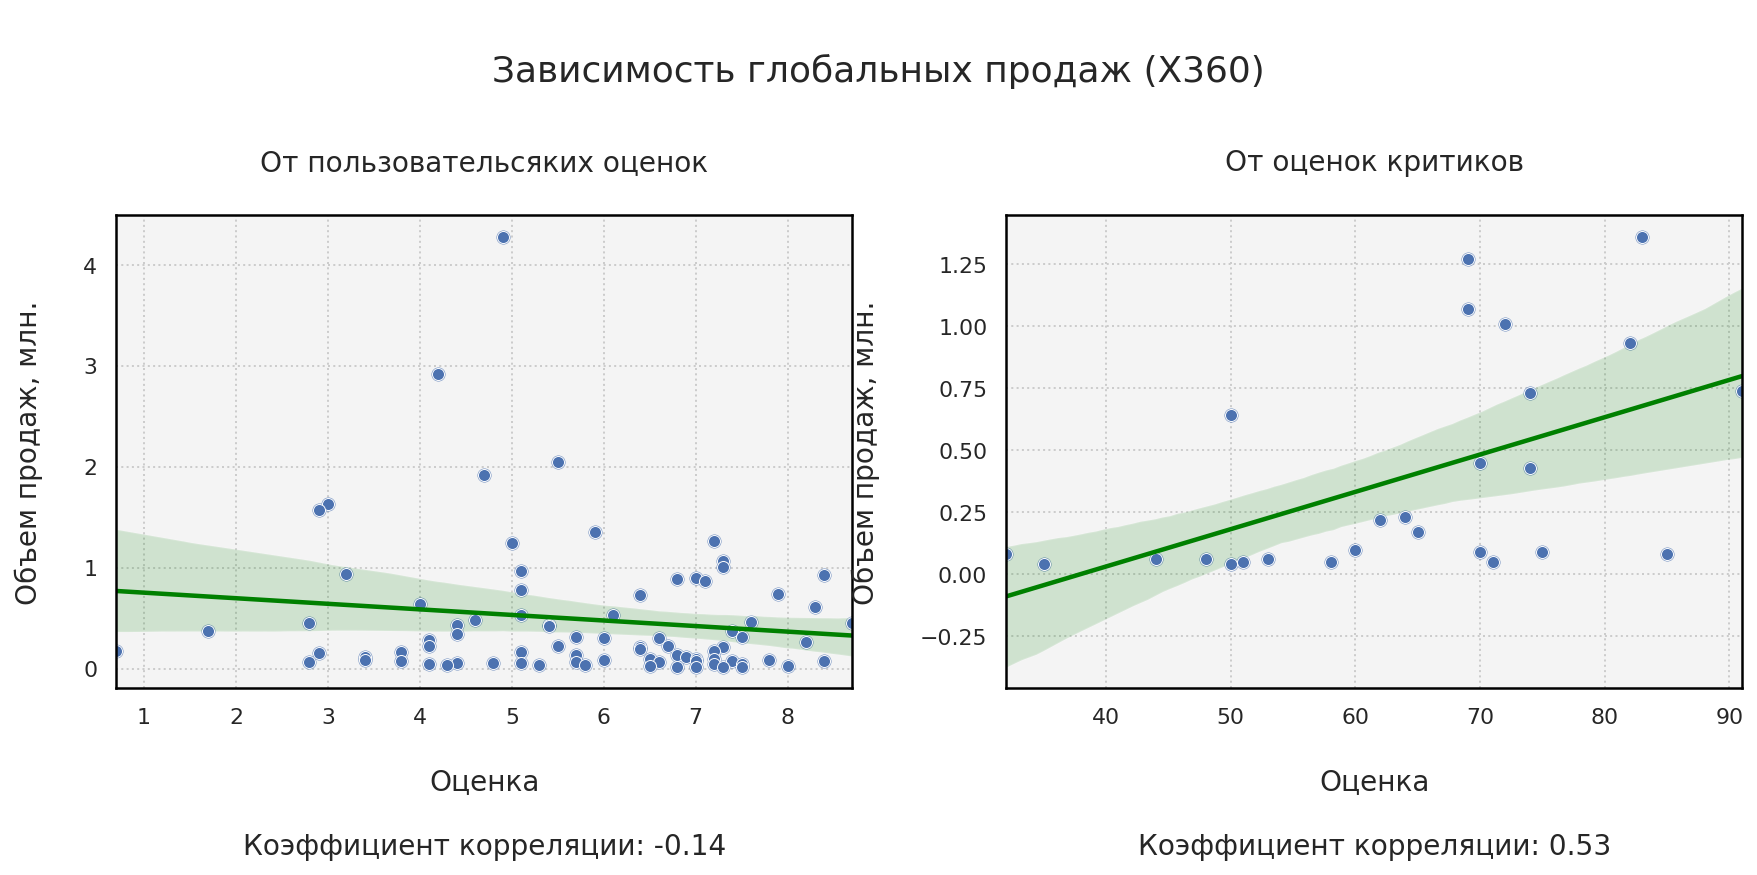

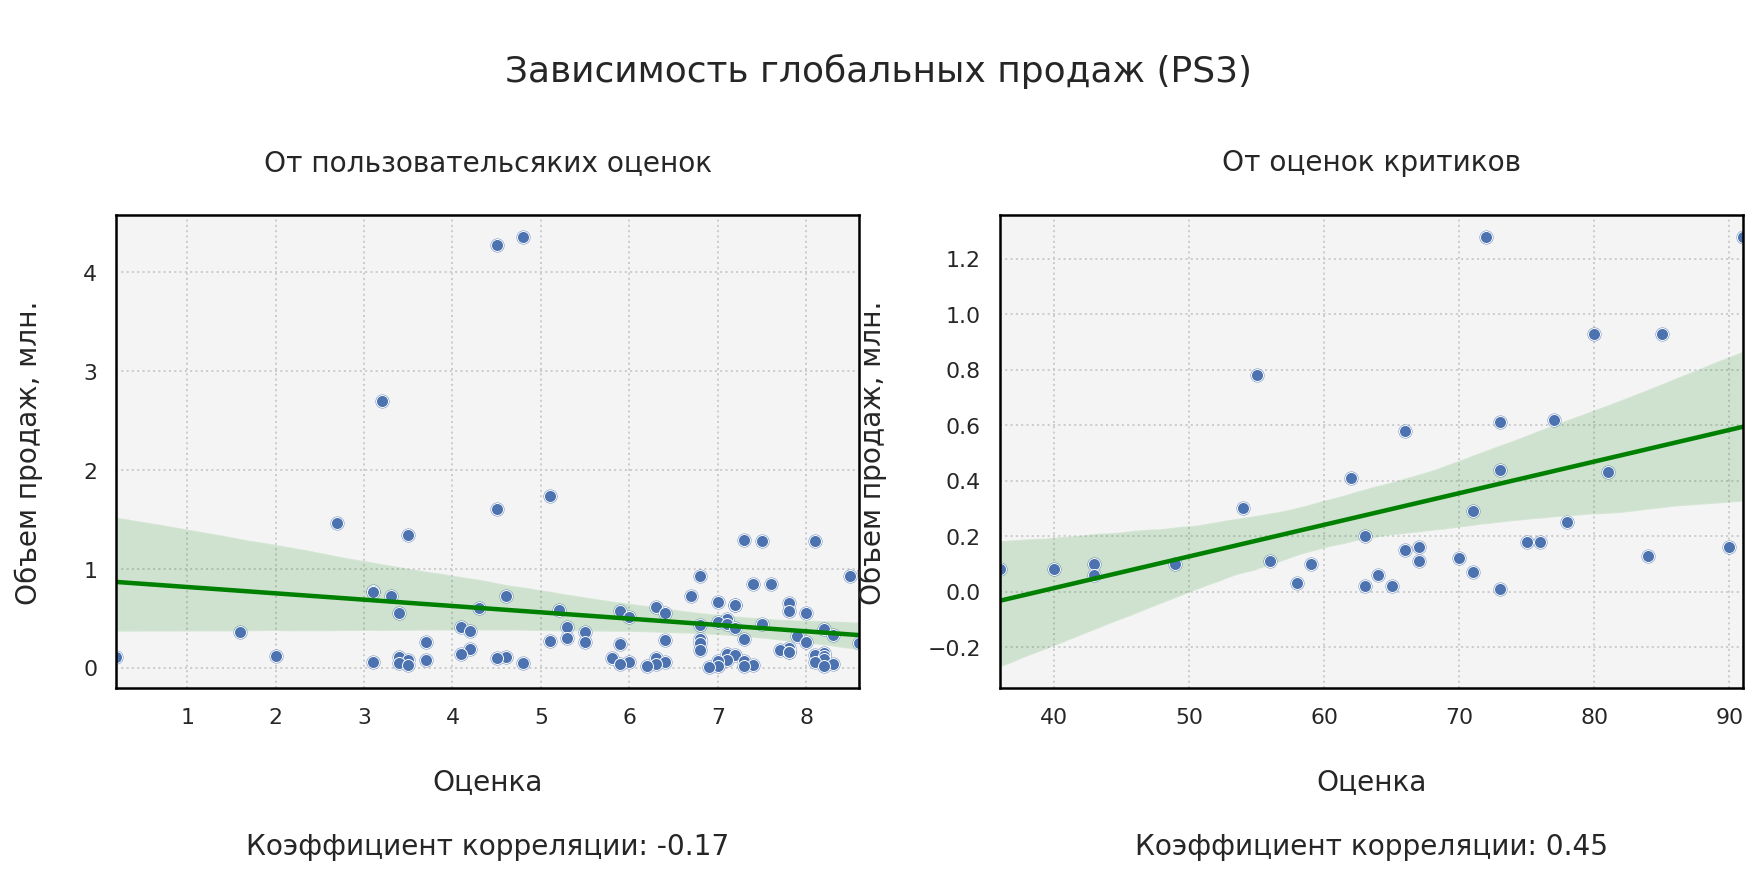

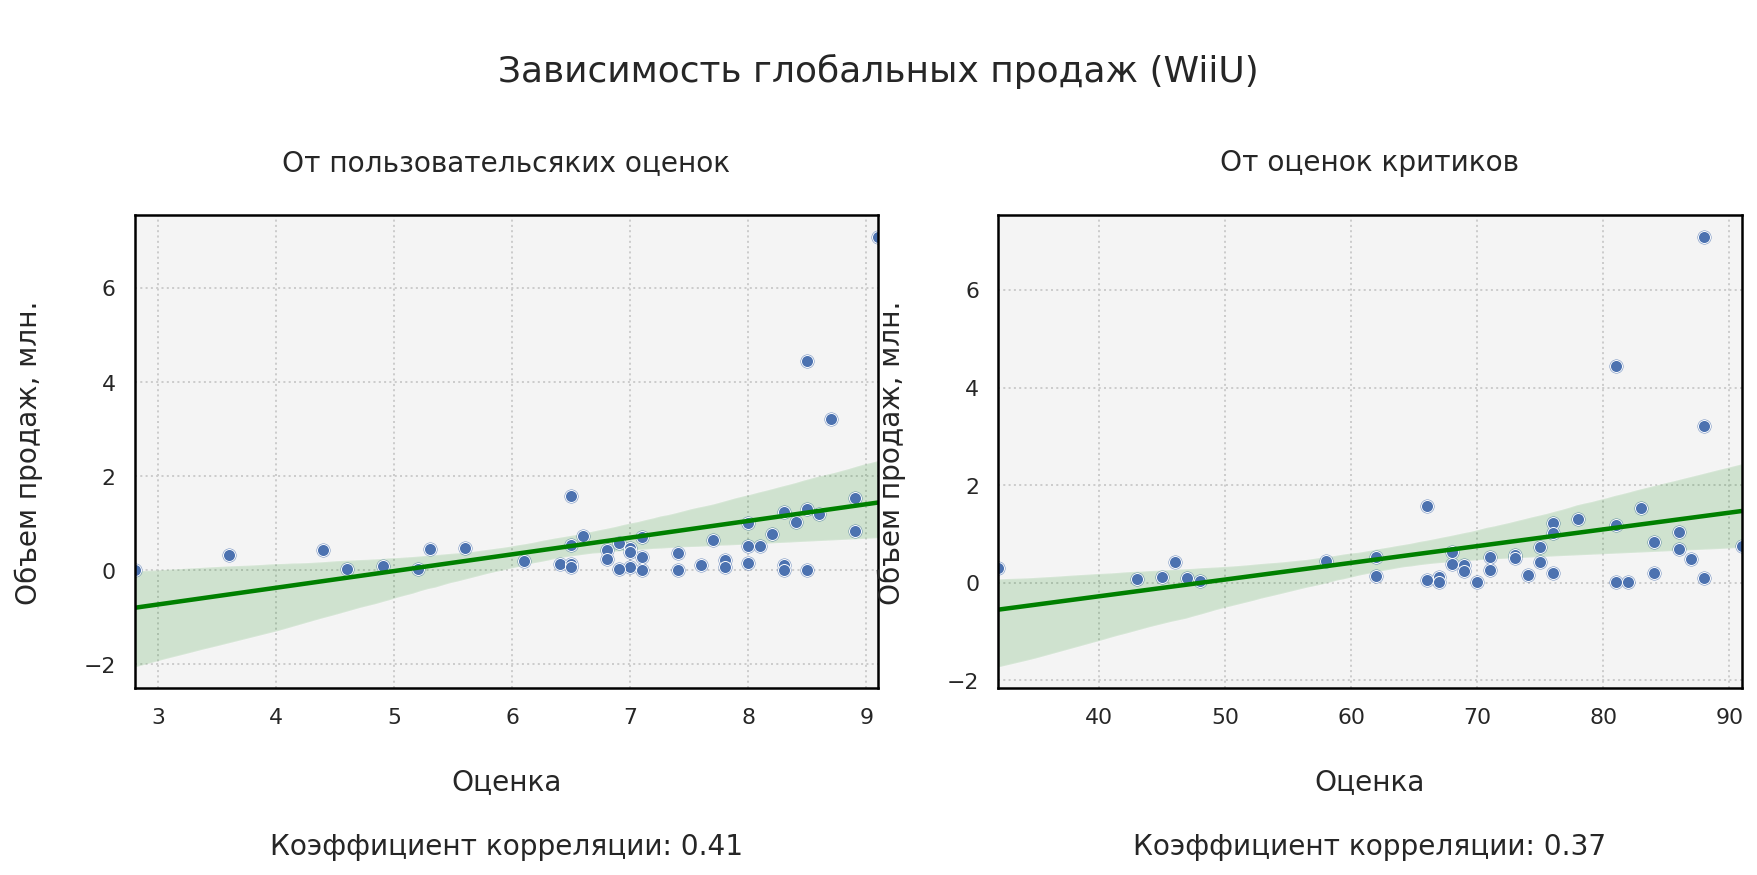

In [63]:
platforms = ['PS4', 'XOne', '3DS', 'X360', 'PS3', 'WiiU']
scores = ['user_score', 'critic_score']
titles = {
    'user_score': '\nОт пользовательсяких оценок\n',
    'critic_score': '\nОт оценок критиков\n',
}
i = {'user_score': 0, 'critic_score': 1,}
for platform in platforms:
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'\nЗависимость глобальных продаж ({platform})\n', fontsize=18)
    
    for score in scores:
        corr = (df_actual.query(f'platform == "{platform}" and {score} > 0')['total_sales']
                .corr(df_actual.query(f'platform == "{platform}" and {score} > 0')[score]).round(2))
        
        sns.regplot(
            ax=axes[i[score]],
            data=df_actual.query(f'platform == "{platform}" and {score} > 0'),
            x=score, y='total_sales',  line_kws = {'color': 'green'})

        sns.scatterplot(
            ax=axes[i[score]],
            data=df_actual.query(f'platform == "{platform}" and {score} > 0'), x=score, y='total_sales')

        axes[i[score]].set_title(titles[score], fontsize=14)
        axes[i[score]].set_xlabel(f'\nОценка\n\nКоэффициент корреляции: {corr}', fontsize=14)
        axes[i[score]].set_ylabel('Объем продаж, млн.\n', fontsize=14)
        
        plt.tight_layout(pad=0)
        
    plt.show()

**Выводы:**
- Исходя из графиков и коэффициентов корреляции, можно сдедать вывод, что есть между пользовательскими оценками и глобальными продажами игр для платформ ***'WiiU'***, ***'3DS'***. По остальным платформам этой зависимости нет. Отрицательные коэффициенты свидетельствуют о наличии выбросов.
- В целом оценки критиков важнее для продвижения игровой платформы.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
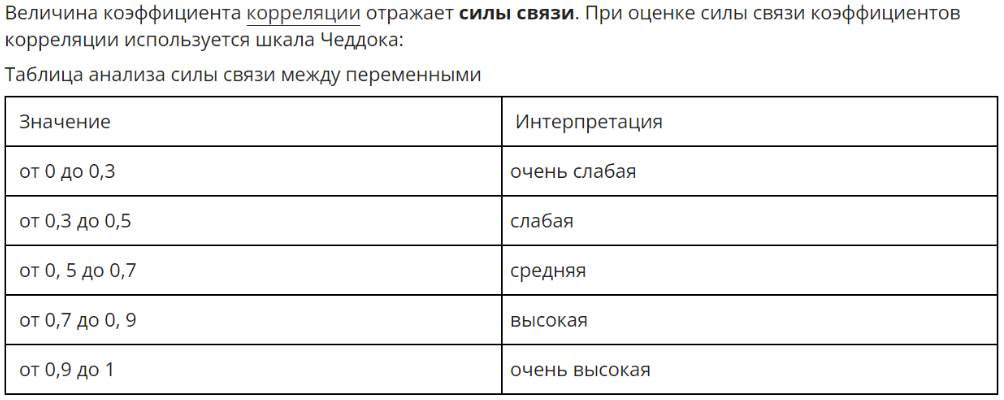

<a name='stage_3_5'></a>
### 3.5 Распределение игр по жанрам

Построим график распределения количества выпущенных игр по жанрам:

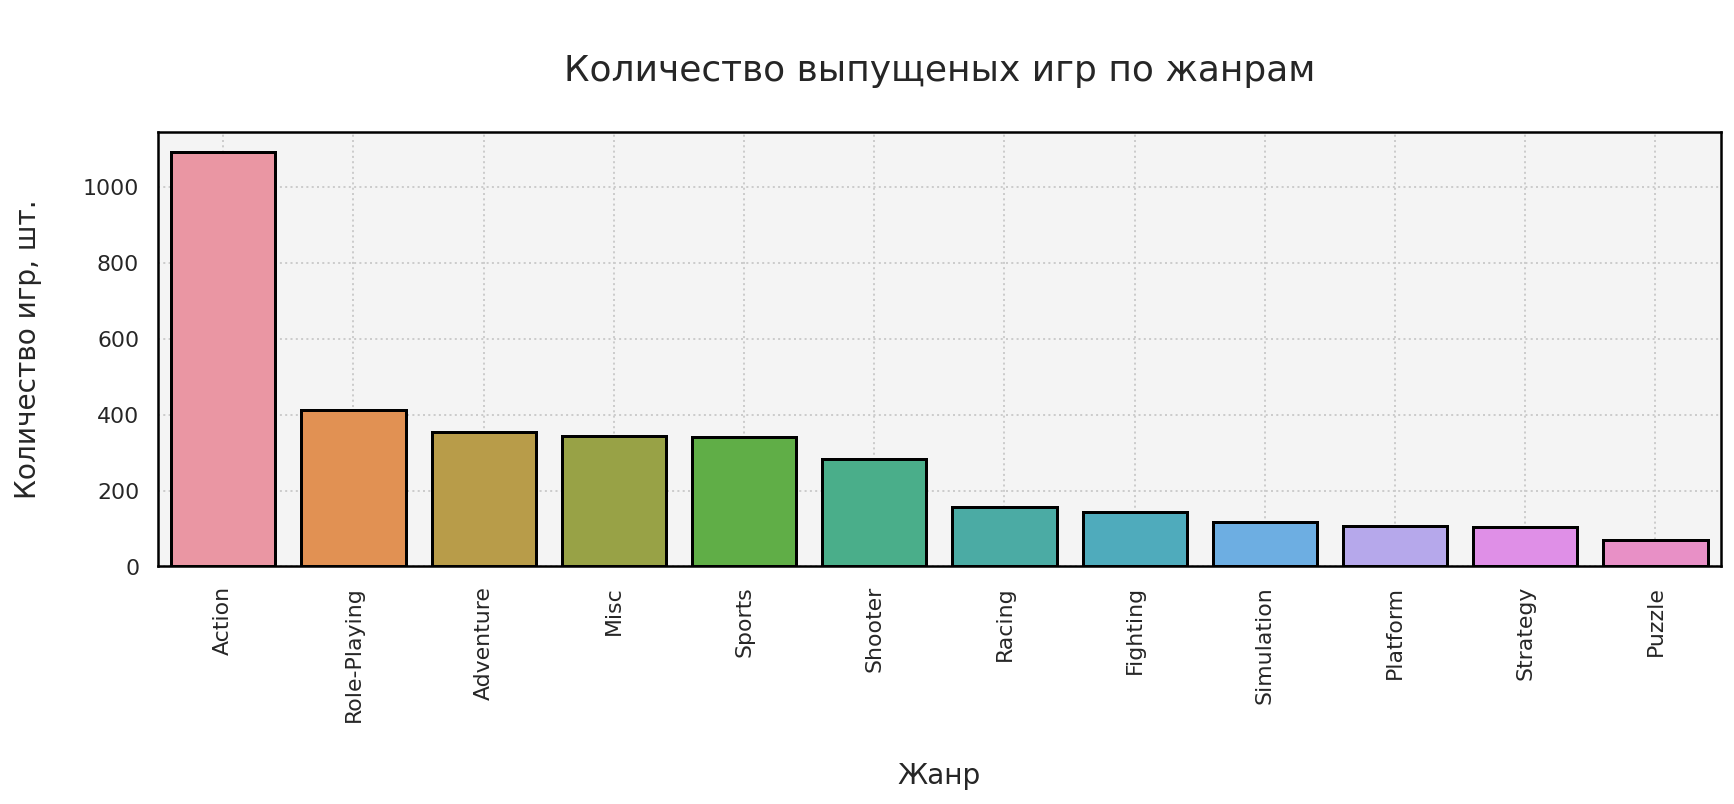

In [64]:
ax = sns.countplot(
    data=df.query('2010 < year_of_release < 2016'),
    x='genre', order = df.query('2010 < year_of_release < 2016')['genre'].value_counts().index,
    linewidth = 1.5, ec='black')

ax.set_title('\nКоличество выпущеных игр по жанрам\n', fontsize=18)
ax.set_xlabel('\nЖанр', fontsize=14)
ax.set_ylabel('Количество игр, шт.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

Построим график распределения глобальных продаж по жанрам:

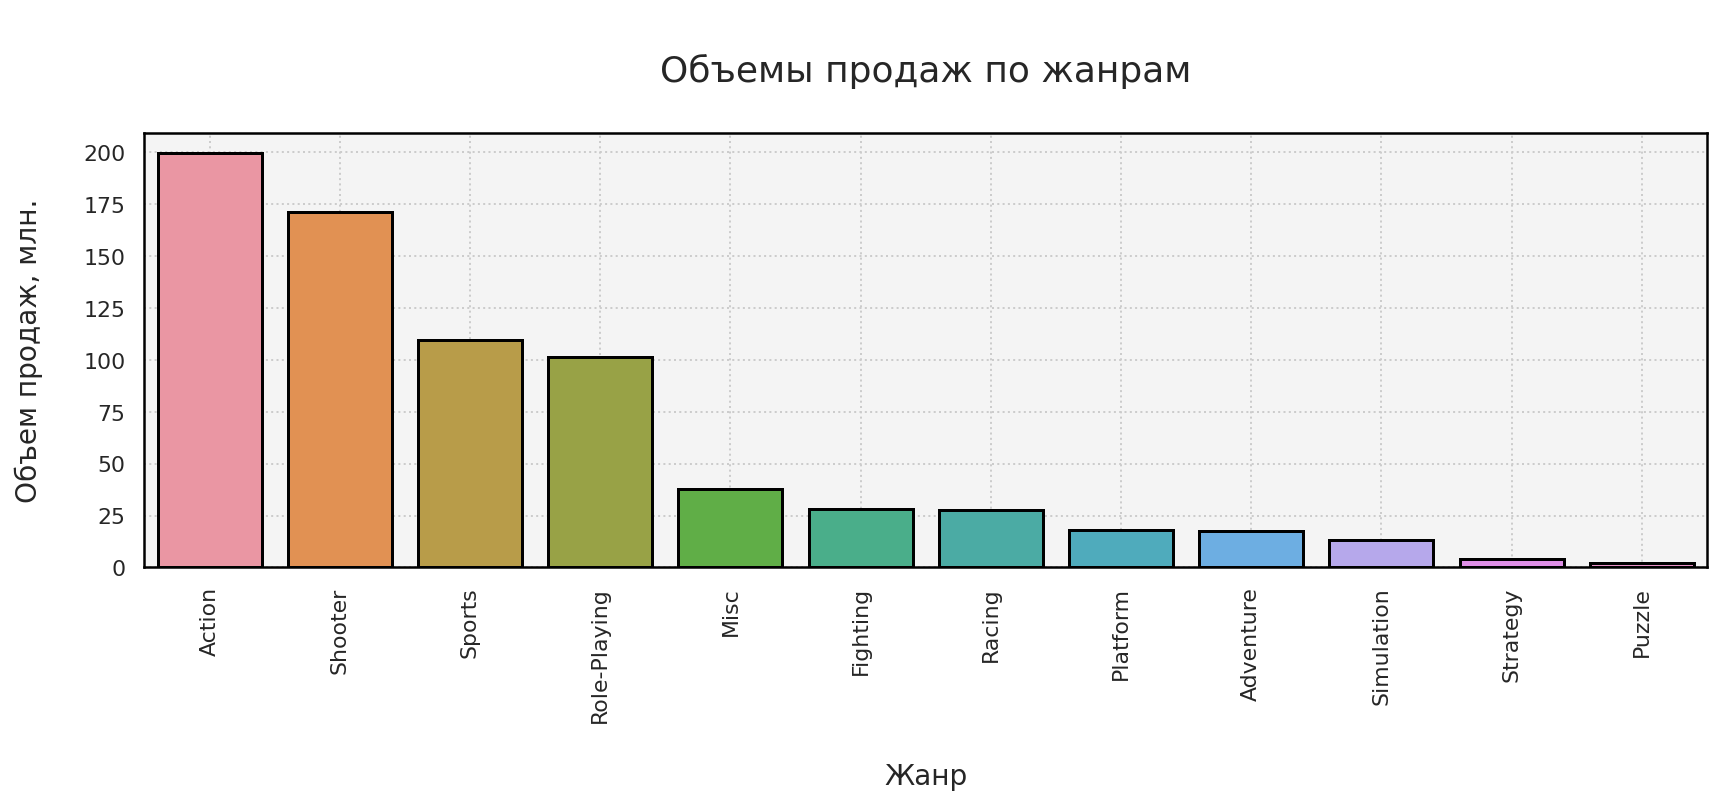

In [65]:
ax = sns.barplot(
    data=df_actual.pivot_table(
        index='genre', values=['total_sales'], aggfunc='sum'
    ).sort_values(by='total_sales', ascending=False).reset_index(),
    x='genre', y='total_sales', linewidth = 1.5, ec='black')

ax.set_title('\nОбъемы продаж по жанрам\n', fontsize=18)
ax.set_xlabel('\nЖанр', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

На обоих графиках лидирует ***'Action'***.  
Однако эти суммарные объемы продаж может зависить от количеству выпущенных игр внутри жанра.  

Проверим наше предположение:

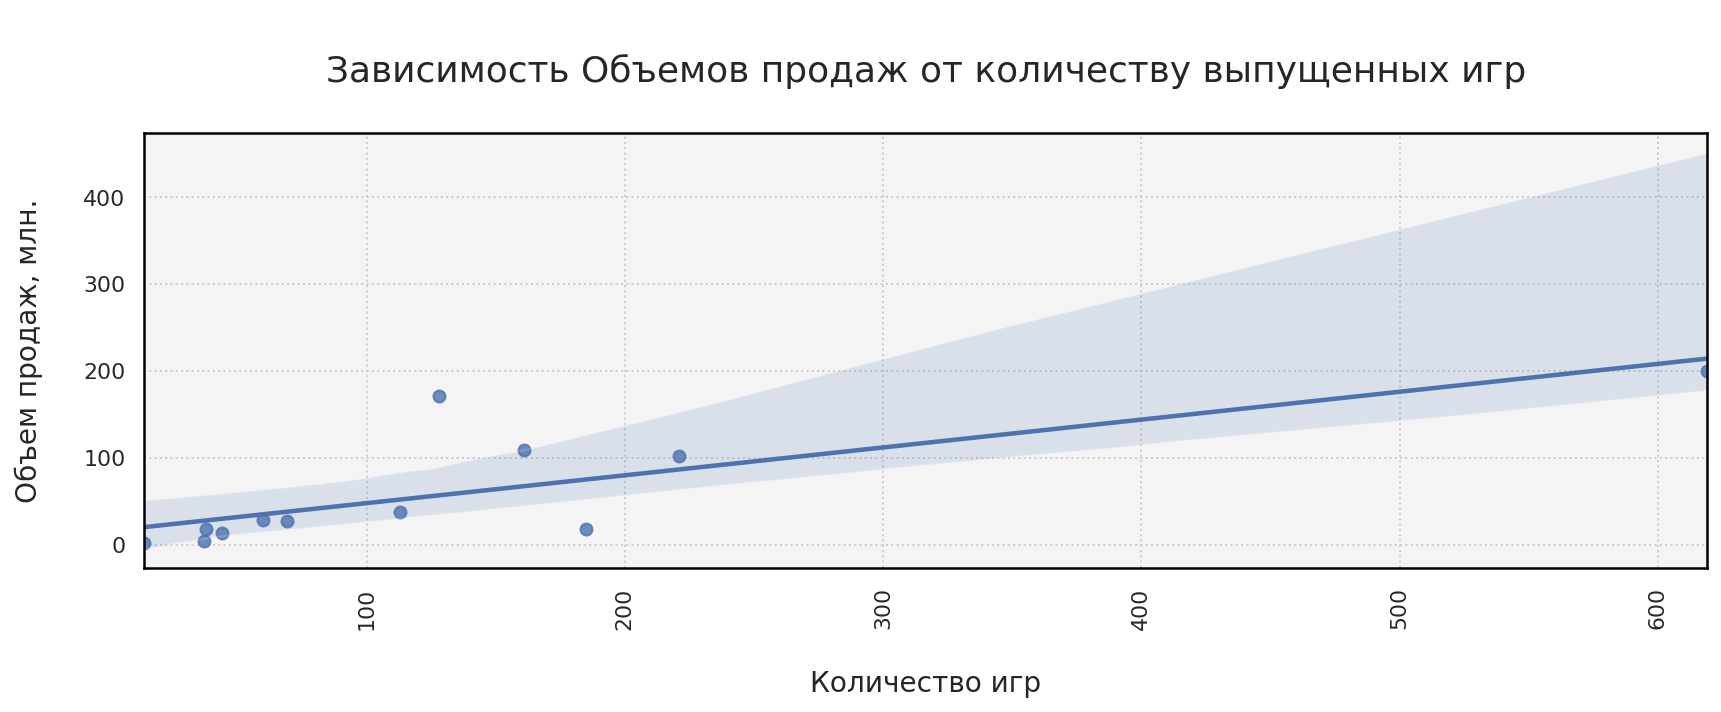

In [66]:
ax = sns.regplot(data=df_actual.groupby('genre')['total_sales'].agg(['count', 'sum']), x='count', y='sum')

ax.set_title('\nЗависимость Объемов продаж от количеству выпущенных игр\n', fontsize=18)
ax.set_xlabel('\nКоличество игр', fontsize=14)
ax.set_ylabel('Объем продаж, млн.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

Судя по графику небольшая линейная зависимость присутствует.  
Рассчитаем для каждого жанра отношение суммарного объема продаж к количеству выпущенных игр:

In [67]:
# genre_pivot = df_actual.query('2010 < year_of_release < 2016').pivot_table(index='genre', values=['total_sales'], aggfunc=['count', 'sum'])
# genre_pivot.columns = ['count', 'sales']
# genre_pivot['rate'] = genre_pivot['sales'] / genre_pivot['count']

In [68]:
# genre_pivot

In [69]:
# ax = sns.barplot(
#     data=genre_pivot['rate'].sort_values(ascending=False).reset_index(),
#     x='genre', y='rate', linewidth = 1.5, ec='black')

# ax.set_title('\nСредний объем продаж на одну выпущенную игру по жанрам\n', fontsize=18)
# ax.set_xlabel('\nЖанр', fontsize=14)
# ax.set_ylabel('Средний объем продаж, млн.\n', fontsize=14)

# ax.tick_params(axis='x', labelrotation=90)
# ax.yaxis.grid(True)
# ax.xaxis.grid(True)

# plt.show()

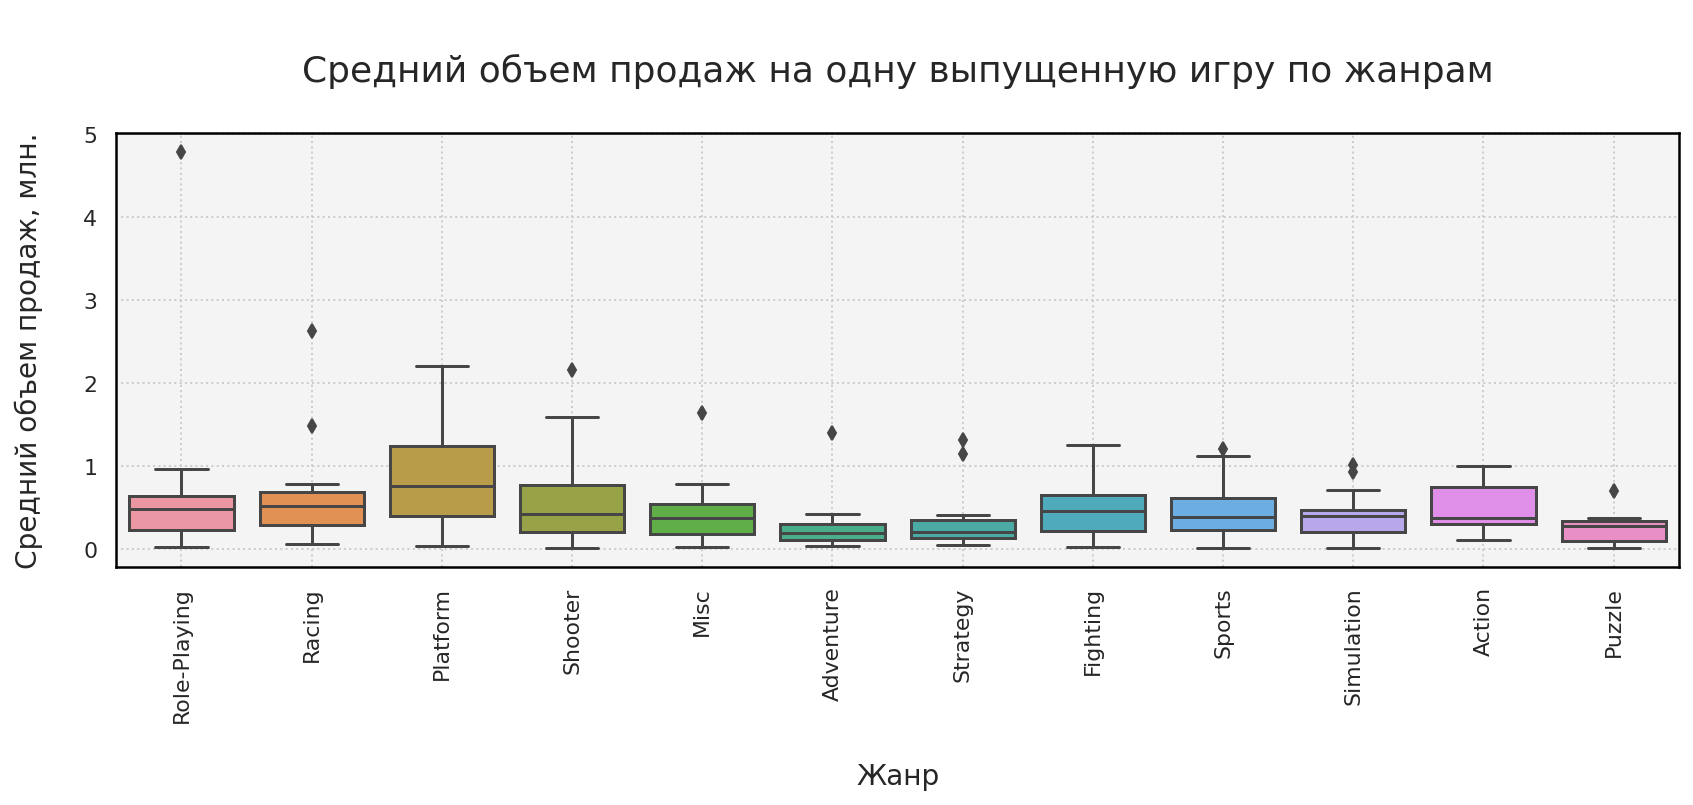

In [70]:
df_grouped = df.groupby(['genre', 'platform'])['total_sales'].agg(['count', 'sum'])
df_grouped.columns = ['count', 'sales']
df_grouped['rate'] = df_grouped['sales'] / df_grouped['count']
df_grouped

ax = sns.boxplot(
    data=df_grouped['rate'].sort_values(ascending=False).reset_index(),
    x='genre', y='rate')

ax.set_title('\nСредний объем продаж на одну выпущенную игру по жанрам\n', fontsize=18)
ax.set_xlabel('\nЖанр', fontsize=14)
ax.set_ylabel('Средний объем продаж, млн.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

Наблюдаем выбросы по жанрам **`Role-Plaing`** и **`Racing`**, избавимся от них:

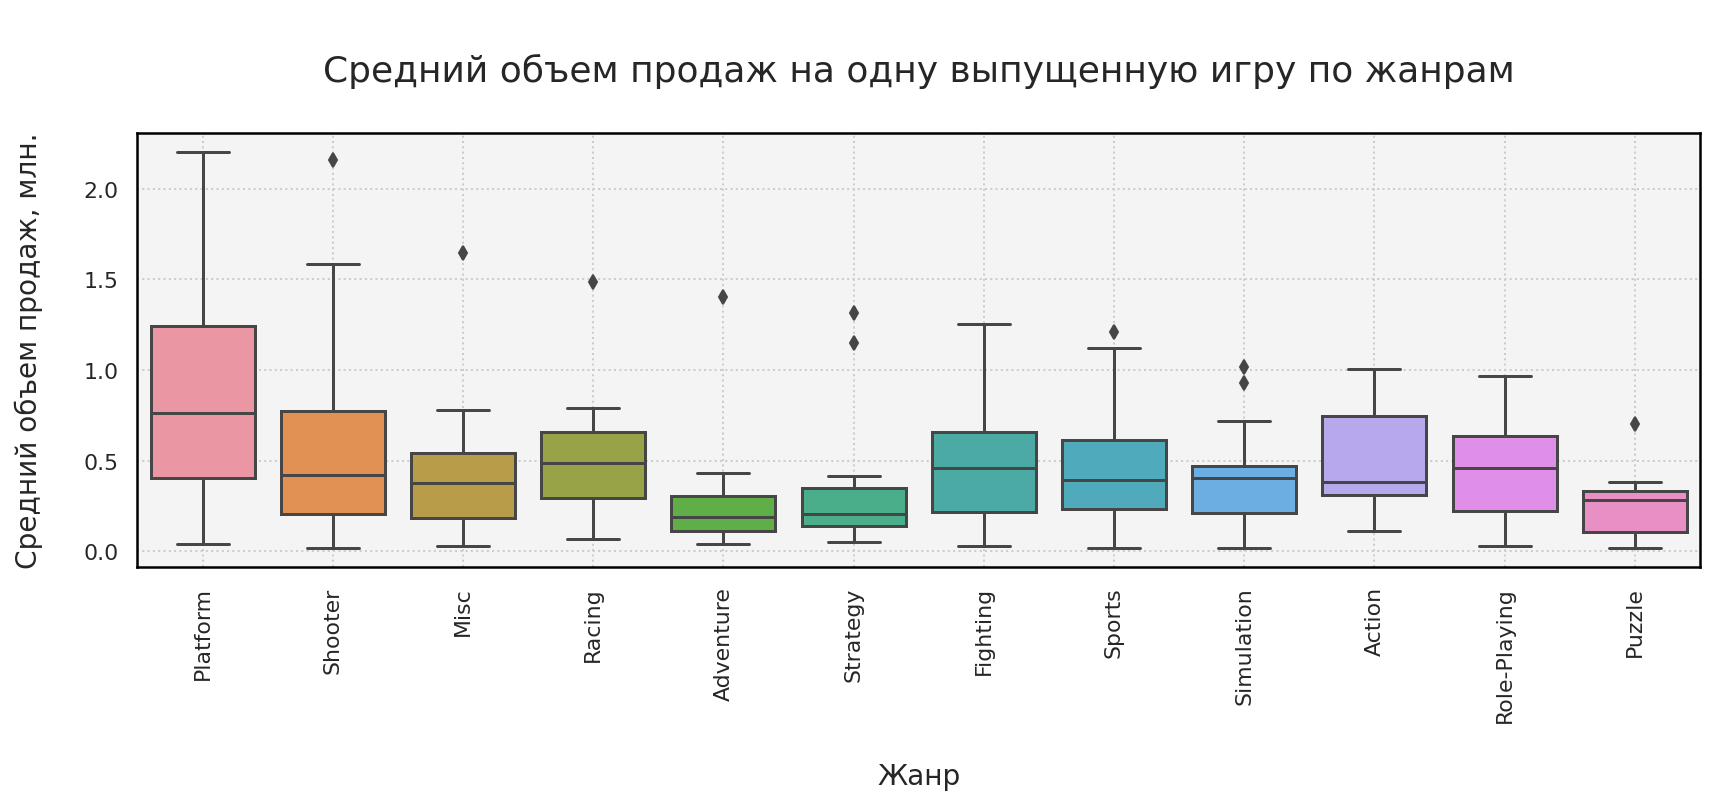

In [71]:
ax = sns.boxplot(
    data=df_grouped[df_grouped['rate'] < 2.5]['rate'].sort_values(ascending=False).reset_index(),
    x='genre', y='rate')

ax.set_title('\nСредний объем продаж на одну выпущенную игру по жанрам\n', fontsize=18)
ax.set_xlabel('\nЖанр', fontsize=14)
ax.set_ylabel('Средний объем продаж, млн.\n', fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.show()

**Выводы:**
- По количеству выпущенных игр (за актуальный период) с большим отрывом лидируют игры в жанре ***'Action'***
- По объему глобальных продаж (за актуальный период) лидируют игры в жанрах ***'Action'*** и ***'Shooter'***.
- Несмотря на то, что игры в жанре ***'Shooter'*** занимают 2-е место по объему продаж, количество выпускаемых игр далеко не самое большое в сравнении с другими жанрами. Это связано с тем, что игры в данном жанре технически более сложные и более затратные для производства.
- В жанре ***'Platform'*** высокий покозатель объема продаж на одну выпущенную игру. Учитывае сравнительно невысокие затраты на производство игр, данныйм жанр можно рассматривать как перспективный.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Здесь была ловушка, что максимальные продажи являются самыми прибыльными. В датасете продажи по жанру для разных платформ и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы по этому жанру были не удачны. Но для прибыльности нам нужны стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.  Было бы не плохо сравнение средних продаж проиллюстрировать диаграммой размаха. Сделаем? </font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Сделал. Ты был прав, выбросы по некоторым платформам сильно искажали результаты</font>

<a name='stage_4'></a>
## 4. Портрет пользователя по регионам

**Для пользователей каждого региона (NA, EU, JP) определим:**
- Наиболее популярные платформы (Топ-5).
- Наиболее популярные жанры (Топ-5).
- Влияние рейтинга ESRB на продажи в отдельном регионе.

In [72]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
colors = ['#4e86c1', '#5f9e6e', '#cc8963']

<a name='stage_4_1'></a>
### 4.1 Топ-5 популярных платформ

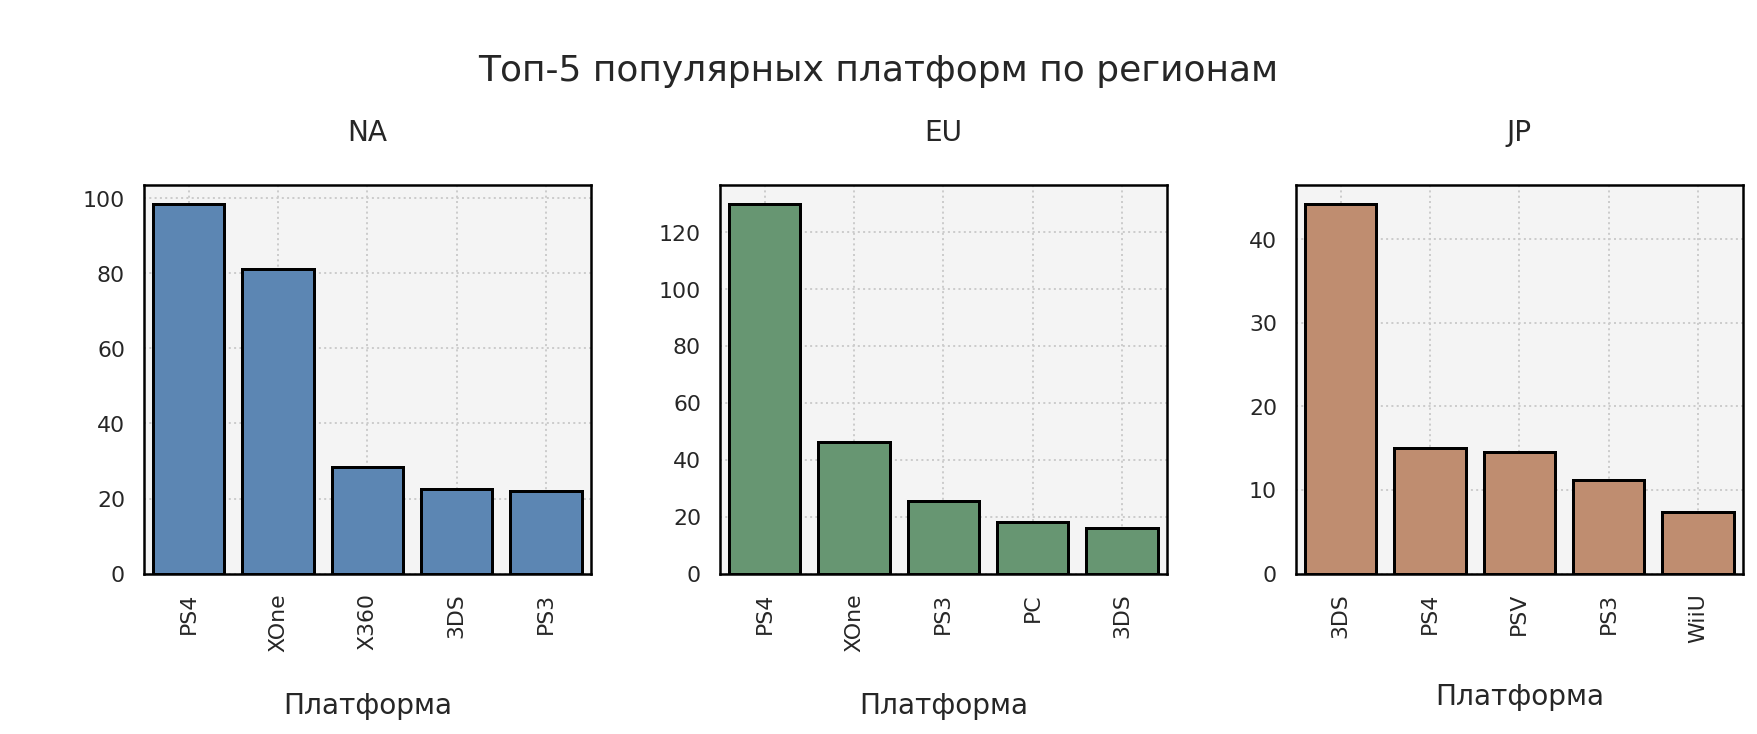

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('\nТоп-5 популярных платформ по регионам\n', fontsize=18)

for i in range(len(sales)):
    ax = sns.barplot(ax=axes[i],
            data = df_actual.groupby('platform')[sales[i]]
                 .sum().sort_values(ascending=False).head(5).to_frame().reset_index(),
            x='platform', y=sales[i], color=colors[i], linewidth = 1.5, ec='black')

    ax.set_title('{}\n'.format(sales[i][:2].upper()), fontsize=14)
    ax.set_xlabel('\nПлатформа', fontsize=14)
    ax.set_ylabel(' \n ', fontsize=14)
    
    ax.tick_params(axis='x', labelrotation=90)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    
    plt.tight_layout(pad=0)

plt.show()

**Выводы:**
- Топ-5 платформ для Северной Америки и Европы одинаковы.
- В Японии отдают предпочтение более старой версии ***'XBox'***. Это может быть обусловлено более поздним выходом новых платформ на Японский рынок.

<a name='stage_4_2'></a>
### 4.2 Топ-5 популярных жанры

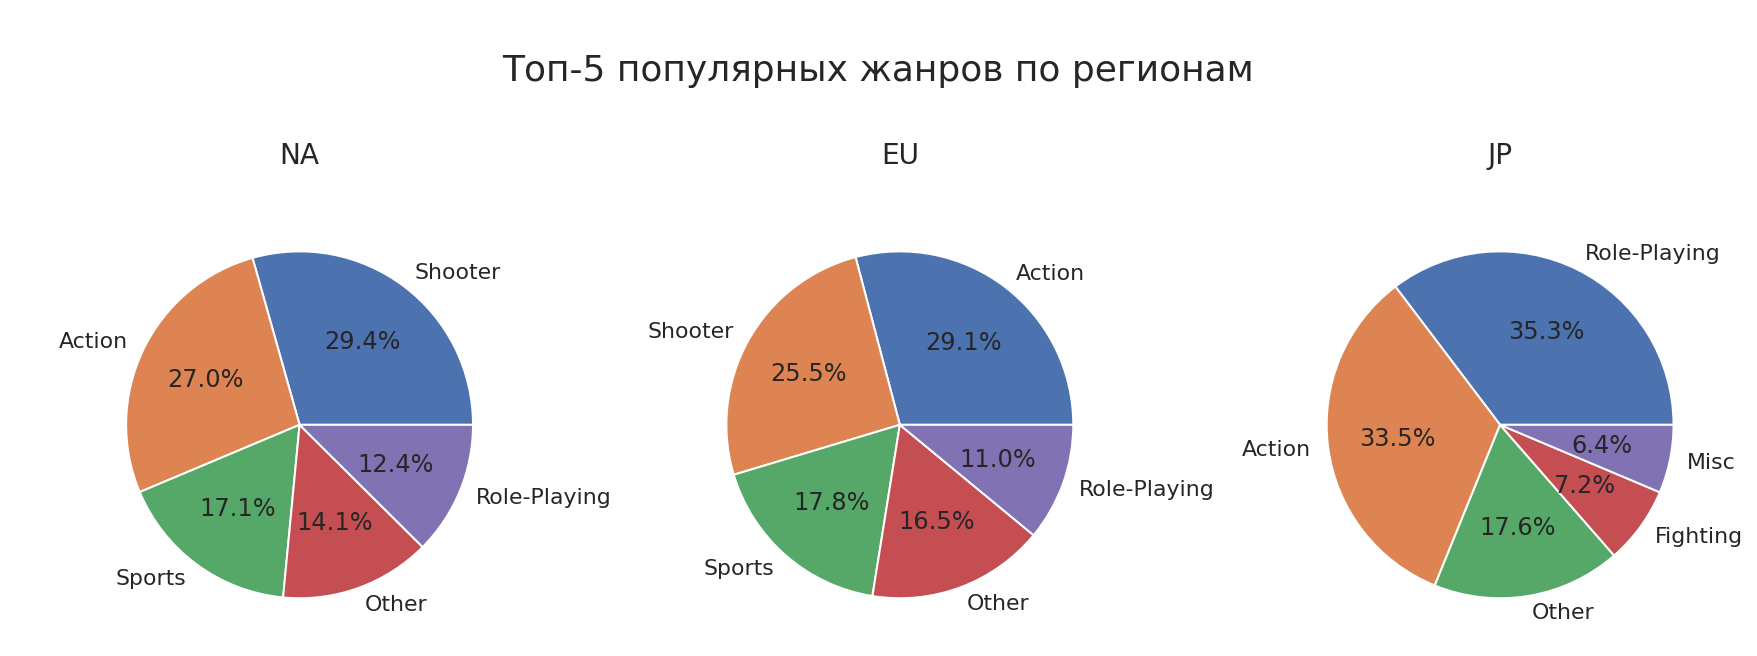

In [74]:
df_grouped = df_actual

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('\nТоп-5 популярных жанров по регионам\n', fontsize=18)

for i in range(len(sales)):
    top_genres = df_actual.groupby('genre')[sales[i]].sum().sort_values(ascending=False).head(5).to_frame().reset_index()['genre']
    df_grouped = df_actual.copy()[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
    df_grouped.loc[~df_grouped['genre'].isin(top_genres), 'genre'] = 'Other'

    (df_grouped.groupby('genre')[sales[i]].sum().sort_values(ascending=False).head(5).to_frame()
         .plot(kind='pie', ax=axes[i], subplots=True, legend=False, autopct='%1.1f%%'))
    
    axes[i].set_title('{}\n'.format(sales[i][:2].upper()), fontsize=14)
    axes[i].set_ylabel(' \n ', fontsize=14)
    
    plt.tight_layout(pad=0)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А у нас в задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Сделаем? Примерно вот так:</font>
<!-- ![image.png](attachment:image.png) -->

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Сделал.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец! <br>Теперь на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.</font>

**Выводы:**
- ТОП-5 жанров для Северной Америки и Европы практически не отличаются - ***'Action'***, ***'Shooter'***, ***'Sport'***, ***'Role-Playing'*** занимают лидирующие позиции. Это свидетельствует о том, что данные регионы представляют часть глобального рынка игровой индустрии.
- Японский рынок отличается. На первое место выходят игры в жанре ***'Role-Playing'***, что может быть связано с  менталитетом игроков и обособенностью рынка. Также популярен жанр ***'Action'***, а вот ***'Shooter'*** в Топ-5 списке жанров нет. 

<a name='stage_4_3'></a>
### 4.3 Влияние  ESRB рейтинга на объем продаж

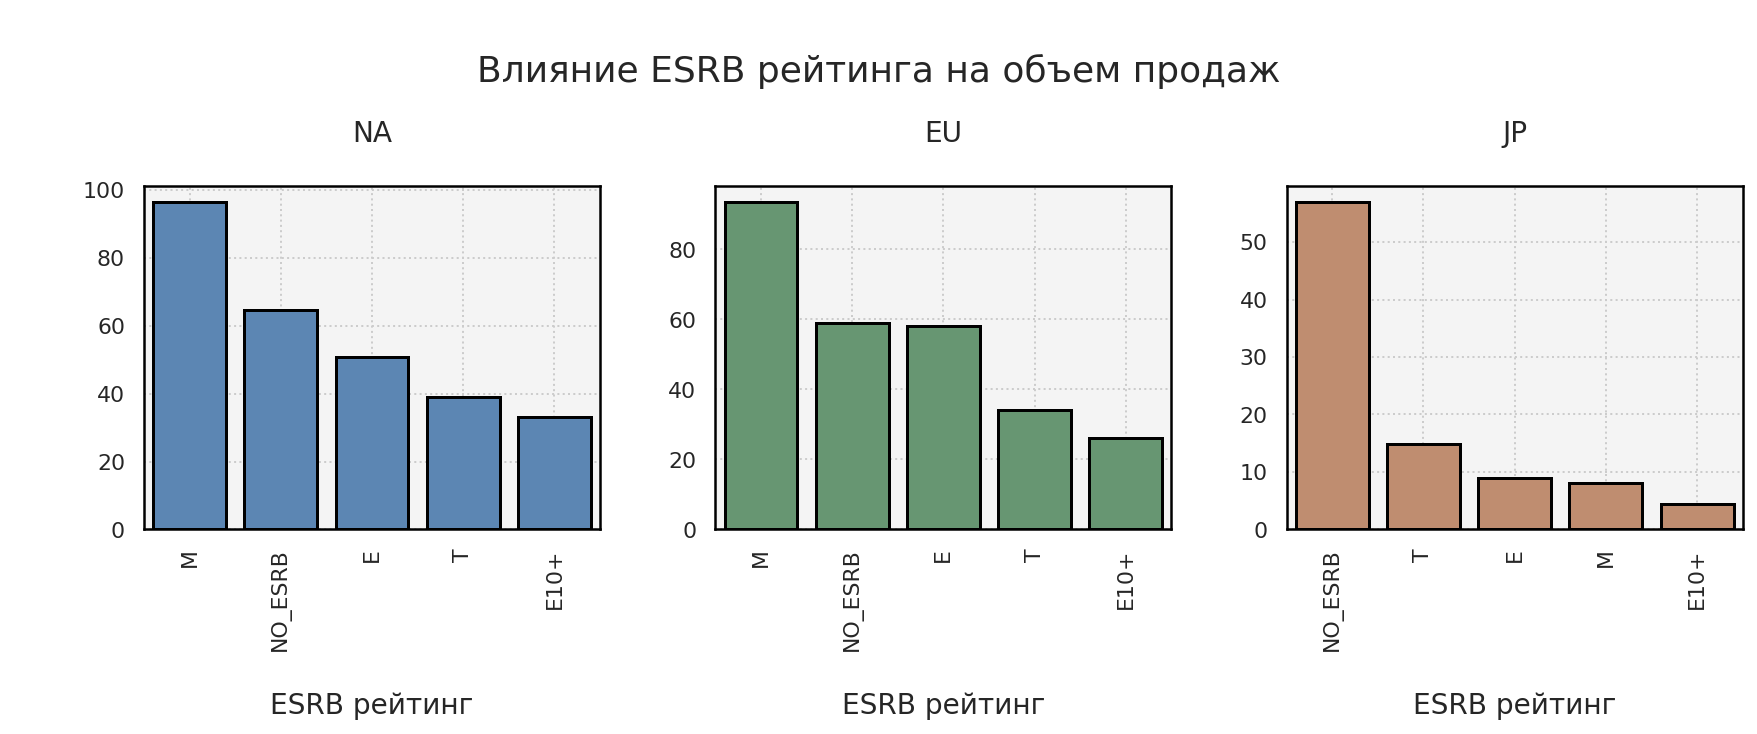

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('\nВлияние ESRB рейтинга на объем продаж\n', fontsize=18)

for i in range(len(sales)):
    ax = sns.barplot(ax=axes[i],
            data = df_actual.query('rating != ""').groupby('rating')[sales[i]]
                 .sum().sort_values(ascending=False).head(5).to_frame().reset_index(),
            x='rating', y=sales[i], color=colors[i], linewidth = 1.5, ec='black')

    ax.set_title('{}\n'.format(sales[i][:2].upper()), fontsize=14)
    ax.set_xlabel('\nESRB рейтинг', fontsize=14)
    ax.set_ylabel(' \n ', fontsize=14)
    
    ax.tick_params(axis='x', labelrotation=90)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    
    plt.tight_layout(pad=0)

plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных поставили заглушку на пропуски в рейтинге ESRB и это правильно. Но при фильтрации мы их исключили и игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Blue'>Сделал. Но если честно, я не совсем понял, как теперь делать какие-либо выводы, учитывая, что в Японии большую часть в объеме продаж занимают игры с неопределенным рейтингом. Надеюсь это не будет поводом для повторной доработке проекта, поскольку сегодня жесткий дедлайн</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данным и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

**Выводы:**
- Влияние ESRB рейтинга на объемы продаж в Северной Америке и Европе идентичное. Большинство игр покупают с рейтингом ***'M'*** (17+).
- В Японии большинство игр покупают для детей и подростков (категории ***'E'*** и ***'T'***). Игры для взрослых покупают меньше, чем в Европе и Северной Америке, хотя большую часть в объеме продаж занимают игры с неопределенным рейтингом, возможно срених много игр для взрослых.

<a name='stage_5'></a>
## 5. Проерка гипотиз

<a name='stage_5_1'></a>
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H_0: `Средняя оценка пользователей 'Xbox One' = Средняя оценка пользователей 'PC'`  
Альтернативная гипотеза H_1: `Средняя оценка пользователей 'Xbox One' ≠ Средняя оценка пользователей 'PC'`  

Уровень значимости: `0.05`

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [76]:
alpha = 0.05

results = st.ttest_ind(
    df_actual.query('platform == "XOne" and user_score > 0')['user_score'],
    df_actual.query('platform == "PC" and user_score > 0')['user_score'])

print('p-value = {:.2f}'.format(results.pvalue))

print(
    'Среднее знвчение ("XOne") = {:.2f}'.format(
        df_actual.query('platform == "XOne" and user_score > 0')['user_score'].mean()
    )
)

print(
    'Среднее знвчение ("PC") = {:.2f}'.format(
        df_actual.query('platform == "PC" and user_score > 0')['user_score'].mean()
    )
)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.10
Среднее знвчение ("XOne") = 6.59
Среднее знвчение ("PC") = 6.30
Не получилось отвергнуть нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали заглушки.</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

**Вывод:**  

Эмпирически полученные данные не противоречат гипотезе H0:  
`Средняя оценка пользователей 'Xbox One' = Средняя оценка пользователей 'PC'`

<a name='stage_5_2'></a>
### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H_0: `Средняя оценка пользователей 'Action' игр = Средняя оценка пользователей 'Sports' игр`  
Альтернативная гипотеза H_1: `Средняя оценка пользователей 'Action' игр ≠ Средняя оценка пользователей 'Sports' игр`  

Уровень значимости: `0.05`

In [77]:
alpha = 0.05

results = st.ttest_ind(
    df_actual.query('genre == "Action" and user_score > 0')['user_score'],
    df_actual.query('genre == "Sports" and user_score > 0')['user_score'])

print('p-value = {:.22f}'.format(results.pvalue))

print(
    'Среднее знвчение ("Action") = {:.2f}'.format(
        df_actual.query('genre == "Action" and user_score > 0')['user_score'].mean()
    )
)

print(
    'Среднее знвчение ("Sports") = {:.2f}'.format(
        df_actual.query('genre == "Sports" and user_score > 0')['user_score'].mean()
    )
)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.0000000000000000002871
Среднее знвчение ("Action") = 6.76
Среднее знвчение ("Sports") = 5.23
Отвергаем нулевую гипотезу


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>Средние значения добавил</font>

**Вывод:**  

Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H1:  
`Средняя оценка пользователей 'Action' игр ≠ Средняя оценка пользователей 'Sports' игр`

<a name='stage_6'></a>
## 6. Результаты исследования

- Начиная 2011 года в целом рынок видеоигр находится в упадке, что может быть связан со снижением количества игровых платформ и  миграцией игровой индустрии на мобильные платформы.
- В среднем период "жизни" игровой платформы длится около 10 лет.
- На 2017 год актуальные платформы, игры для которых стоит продвигать: **`PS4`** и **`XOne`**
- Наиболее популярные жанры В Северной Америке и Европе - ***'Action'*** и ***'Shooter'***, в Японии - ***'Action'*** и ***'Role-Playing'***.
- Стоит присмотреться к играм в жанре ***'Platform'***, который имеет хорошие показатели в соотношении объемов продаж к количеству выпущенных игр. К тому же, произвотство игр данного жанра дешевле, чем ***'Action'*** и ***'Shooter'***  
- В отличии от Северной Америки и Европы, в Японии лучше всего продаются игры для детей и подростков

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет. <br>У нас вся информация в проекте уже есть, но они же не аналитики, им надо пальцем показать, точнее акцентировать их креативное внимание. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='Blue'><b>Комментарий студента</b></font><br>
<font color='Green'>Вроде прошелся по всем замечаниям. Из-за уменьшения актуального периода действительно некоторые выводы изменились. Прошу строго не судить, еле успеваю к жесткому дедлайну.На самом деле много проблем из-за того, что иногда слишком глубоко капаю, и на описательную часть (план работы, выводы и тюдю уходит много времени)</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Александр, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Выбрать меньший актуальный период для прогнозирования и включить в него 2016 год. Построить диаграмму размаха по глобальным продажам игр в разбивке по всем платформам. Анализ влияния отзывов на продажи надо провести по нескольким платформам. Переделать анализ влияния рейтинга ESRB на продажи в регионах.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Александр! Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
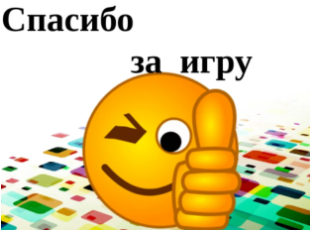